# RQ1

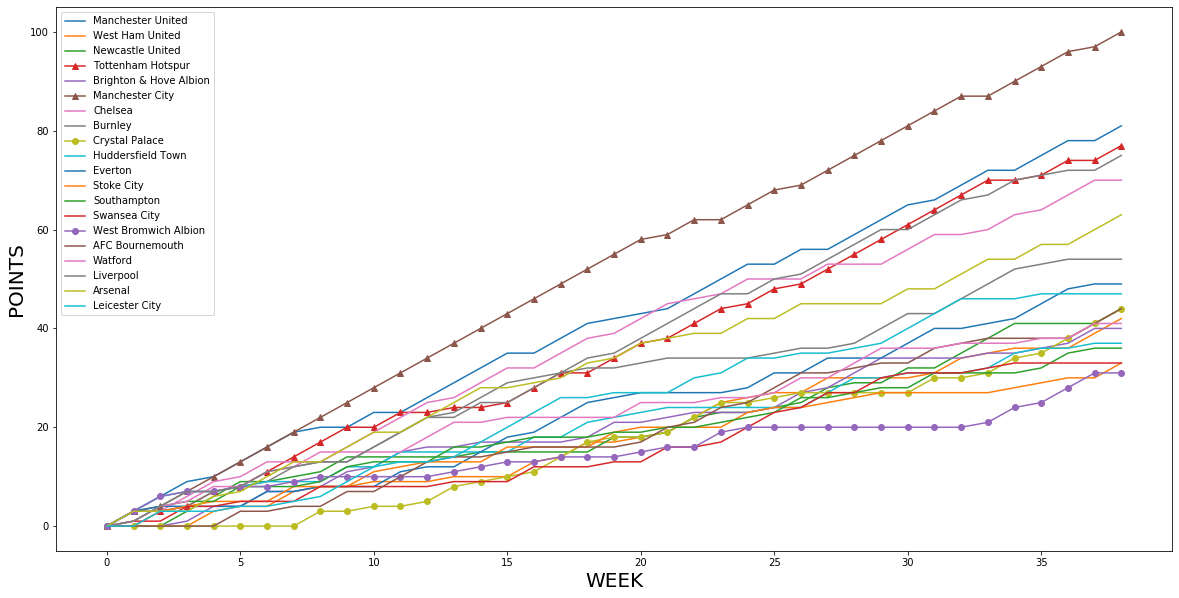

In [3]:
import pandas as pd

data1=pd.read_json("matches_England.json")
df=pd.DataFrame(data1,columns=["gameweek","label"])

d={}  #dizionario punteggi

v={}  #dizionario vittorie
l={}  #dizionario sconfitte
record={}  #dizionario record positivo
loses={}  #dizionario record negativo

for i in range(1,39):
    df1=(df[df["gameweek"]==i])     #riduzione database alla singola gameweek
    for el in df1['label']:
        match=(el.split(', '))
        hometeam=((match[0]).split(" - "))[0]
        awayteam=((match[0]).split(" - "))[1]
        homescore=((match[1]).split(" - "))[0]
        awayscore=((match[1]).split(" - "))[1]
        
        if(i==1):  #PRIMAPARTITA
            if homescore>awayscore:   #se vince la squadra di casa
                d[hometeam]=[0,3]
                d[awayteam]=[0,0]
                v[hometeam]=1
                l[hometeam]=0
                v[awayteam]=0
                l[awayteam]=1

            if homescore<awayscore:    #se vince la squadra in trasferta
                d[hometeam]=[0,0]
                d[awayteam]=[0,3]
                v[hometeam]=0
                l[hometeam]=1
                v[awayteam]=1
                l[awayteam]=0
                
                
            if homescore==awayscore:    #se le squadre pareggiano
                d[hometeam]=[0,1]
                d[awayteam]=[0,1]
                v[hometeam]=0
                l[hometeam]=0
                v[awayteam]=0
                l[awayteam]=0
                
            record[hometeam]=v[hometeam]     #inizializzazione records
            record[awayteam]=v[awayteam]
            loses[hometeam]=l[hometeam]
            loses[awayteam]=l[awayteam]
                
########################################################################           
                
        if(i>1):   #ALTREPARTITE
            if homescore>awayscore:   #se vince la squadra di casa
                d[hometeam].append(d[hometeam][-1]+3)
                d[awayteam].append(d[awayteam][-1])
                v[hometeam]+=1
                l[hometeam]=0
                v[awayteam]=0
                l[awayteam]+=1
                
            if homescore<awayscore:    #se vince la squadra in trasferta
                d[hometeam].append(d[hometeam][-1])
                d[awayteam].append(d[awayteam][-1]+3)
                v[hometeam]=0
                l[hometeam]+=1
                v[awayteam]+=1
                l[awayteam]=0
                
            if homescore==awayscore:    #se le squadre pareggiano
                d[hometeam].append(d[hometeam][-1]+1)
                d[awayteam].append(d[awayteam][-1]+1)
                v[hometeam]=0
                l[hometeam]=0
                v[awayteam]=0
                l[awayteam]=0
                
            if v[hometeam]>record[hometeam]:   #aggiornamento record positivi
                record[hometeam]=v[hometeam]
            if v[awayteam]>record[awayteam]:
                record[awayteam]=v[awayteam]
            if l[hometeam]>loses[hometeam]:    #aggiornamento record negativi
                loses[hometeam]=l[hometeam]
            if l[awayteam]>loses[awayteam]:
                loses[awayteam]=l[awayteam]


                
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

for key in d:
    if (record[key]==sorted(record.values())[-1])or(record[key]==sorted(record.values())[-2]):
        p=plt.plot(range(39), d[key],'-^')
    
    elif (loses[key]==sorted(loses.values())[-1])or(loses[key]==sorted(loses.values())[-2]):
        p=plt.plot(range(39), d[key],'-o')
    
    else:   
        p=plt.plot(range(39), d[key])                                           

plt.legend(d.keys())

plt.ylabel('POINTS',fontsize=20)
plt.xlabel('WEEK',fontsize=20)
plt.show()

# RQ2

In [5]:
import pandas as pd

data1=pd.read_json("matches_England.json")
df=pd.DataFrame(data1,columns=["gameweek","label"])

h={}  #home dictionary
a={}  #away dictionary


for i in range(1,39):
    df1=(df[df["gameweek"]==i])     
    for el in df1['label']:
        match=(el.split(', '))
        hometeam=((match[0]).split(" - "))[0]
        awayteam=((match[0]).split(" - "))[1]
        homescore=((match[1]).split(" - "))[0]
        awayscore=((match[1]).split(" - "))[1]
        
        if homescore>awayscore:   #if hometeam wins
            if hometeam not in h:
                h[hometeam]=[1,0,0]
                
            else:
                h[hometeam][0]+=1 
                
            if awayteam not in a:
                a[awayteam]=[0,0,1]
            else:
                a[awayteam][2]+=1
                
        if homescore<awayscore:    #if awayteam wins
            if hometeam not in h:
                h[hometeam]=[0,0,1]
            else:
                h[hometeam][2]+=1
            if awayteam not in a:
                a[awayteam]=[1,0,0]
            else:
                a[awayteam][0]+=1
                
        if homescore==awayscore:    #it's a draw!
            if hometeam not in h:
                h[hometeam]=[0,1,0]
            else:
                h[hometeam][1]+=1
            if awayteam not in a:
                a[awayteam]=[0,1,0]
            else:
                a[awayteam][1]+=1
                

##########################

l=[]     #premier league list
for key in h:
    l.append(key)

from scipy.stats import chi2_contingency
from scipy.stats import chi2

for i in range(5):
    table= [h[l[i]],a[l[i]]]

    table=pd.DataFrame(table,columns=['Victories','Draws','Loses'],index=['Home','Away'])
    print(l[i])
    print(table)
 
    #interpret test-statistic
    stat, p, dof, expected = chi2_contingency(table) 
    prob = 0.95
    alpha = 1.0 - prob #our alfa level is 0,05
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (accept H0)')
    critical = chi2.ppf(prob, dof) 
    chi2_contingency(table) #test statistic, p-value, degrees of freedom, expected frequencies
    print()

#H0 = there is no home-field advantage (the two variables are independent) 
#H1 = there is an home-field advantage

#If the p-value is less than or equal to the alpha (p< 0.05), then we reject the null hypothesis. 
#If the p-value is greater than alpha (p > 0.05), then we accept the null hypothesis.

Manchester United
      Victories  Draws  Loses
Home         15      2      2
Away         10      4      5
Independent (accept H0)

Newcastle United
      Victories  Draws  Loses
Home          8      4      7
Away          4      4     11
Independent (accept H0)

Brighton & Hove Albion
      Victories  Draws  Loses
Home          7      8      4
Away          2      5     12
Dependent (reject H0)

Chelsea
      Victories  Draws  Loses
Home         11      4      4
Away         10      3      6
Independent (accept H0)

Crystal Palace
      Victories  Draws  Loses
Home          7      5      7
Away          4      6      9
Independent (accept H0)



# RQ3

      wyId             lastName   birthDate  Age  currentTeamId  \
10    8934                 Howe  1977-11-29   41           1659   
9    71037     Saraiva da Silva  1977-07-12   42           1623   
8   531745     de Míguel Moreno  1973-02-19   46           1613   
7   292863  Pochettino Trossero  1972-03-02   47           1624   
6     8880                Dyche  1971-06-28   48           1646   
5   267136     Guardiola i Sala  1971-01-18   48           1625   
4    93112        Gracia Carlos  1970-05-01   49           1644   
3    14791                Klopp  1967-06-16   52           1612   
1     8093              Hughton  1958-12-11   60           1651   
0     8357              Hodgson  1947-08-09   72           1628   

                        Teams  
10            AFC Bournemouth  
9                  Everton FC  
8         Newcastle United FC  
7        Tottenham Hotspur FC  
6                  Burnley FC  
5          Manchester City FC  
4                  Watford FC  
3     

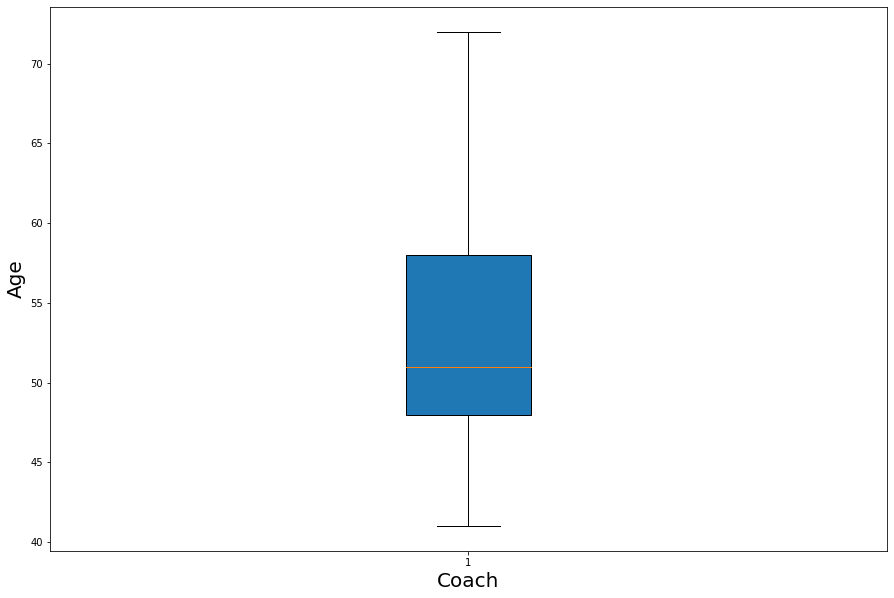

In [11]:
import pandas as pd
from pandas import DataFrame
from datetime import date
from datetime import datetime
import matplotlib.pyplot as plt

#import today
today = date.today()
ntoday = today.isoformat()
stoday = list(map(int,ntoday.split('-')))


coachdata = pd.read_json('coaches.json')
teamdata= pd.read_json('teams.json')
englanddata=pd.read_json('matches_England.json')

#Here I create the data frames with the columns that interest me 
ddd=pd.DataFrame(englanddata,columns=["teamsData"])
dd=pd.DataFrame(coachdata,columns=["wyId","currentTeamId",'birthDate', 'lastName', 'firstName'])
df=pd.DataFrame(teamdata,columns=["wyId",'teamData',"area", 'officialName'])

#create a list with all coachId in matchesdata
coaches=[]
for el in ddd['teamsData']:
    for key in el.keys():
        coaches.append(el[key]['coachId'])

coaches.remove(0)

#create a list with all info we need
c=[]
for indd in dd.index:
    if(dd['wyId'][indd]) in coaches:
   
      c.append([dd['wyId'][indd],dd['lastName'][indd],dd['birthDate'][indd],dd['currentTeamId'][indd]])

#sort every birthdate for choaces
def Sort(sub_li):
 
    # reverse = None (Sorts in Ascending order)
    # key is set to sort using second element of  
    # sublist lambda has been used
    x= sorted(sub_li, key = lambda x: x[2])
    return x
sortc = Sort(c)

################################################################################################################################################

coach = pd.DataFrame(sortc, columns= ['wyId', 'lastName','birthDate', 'currentTeamId']) #dataframe to start 

def calculate_age(born):                                                               #create a function for age column
  
    born = datetime.strptime(born, "%Y-%m-%d").date() 
    today = date.today()
    age =today.year - born.year - ((today.month, today.day) < (born.month, born.day))
   
    return(age)
  
coach['Age'] = coach['birthDate'].apply(calculate_age)                                  # apply the age function

df=pd.DataFrame(teamdata,columns=["area","wyId",'officialName']).dropna()                #start to clean the dataset
Area= pd.concat([df.drop(['area'], axis=1), df['area'].apply(pd.Series)], axis=1)
indexName= Area[Area['name']!= 'England'].index
Area.drop(indexName, inplace = True)


NewArea = pd.DataFrame(Area, columns=['wyId', 'name','officialName'])[:-1]                                  #England teams dataframe

#start to clean the dataset and create a the final englandcoach dataset
Wy= []
for ind in coach.index:
  if (coach['currentTeamId'][ind]) in [i for i in NewArea['wyId']]:
    
    Wy.append([coach['wyId'][ind],coach['lastName'][ind],coach['birthDate'][ind],coach['Age'][ind],coach['currentTeamId'][ind]])

ee=[]
EnglandCoach = pd.DataFrame(Wy, columns= ['wyId', 'lastName','birthDate', 'Age', 'currentTeamId']).drop(2, axis=0)[::-1]  #Englancoach final
for i in EnglandCoach.index:
    ee.append(EnglandCoach['currentTeamId'][i])

xx=[]
for i in df['wyId'].index:
    if df['wyId'][i] in ee:
        xx.append(df['officialName'][i])

EnglandCoach.insert(5, "OfficialName", xx, True)    
    
EnglandCoach = pd.DataFrame(Wy, columns= ['wyId', 'lastName','birthDate', 'Age', 'currentTeamId']).drop(2, axis=0)[::-1]  #Englancoach final
T =  ["AFC Bournemouth", "Everton FC", "Newcastle United FC", "Tottenham Hotspur FC", "Burnley FC" , "Manchester City FC", "Watford FC", "Liverpool FC", "Brighton & Hove Albion FC", "Crystal Palace FC"]

EnglandCoach['Teams'] = T

print(EnglandCoach.head(11))
#########################################################################################################################

age=[]                                                            #create a boxplot

for el in coach['Age']:
  age.append(el)

box_plot_data=[age]   
print(coach['Age'].describe(), '\n')
  
plt.figure(figsize=(15,10))
plt.ylabel('Age',fontsize=20)
plt.xlabel('Coach', fontsize=20)
plt.boxplot(box_plot_data, patch_artist=True)

plt.show()

# RQ4

In [6]:
import pandas as pd

data=pd.read_json("events_England.json")
df=pd.DataFrame(data,columns=['eventName','tags','playerId'])

d={} #total passes for every player
for ind in df.index:
    if (df['eventName'][ind]=='Pass'):
        if df['playerId'][ind] not in d:
             d[df['playerId'][ind]]=1
        else:
             d[df['playerId'][ind]]+=1

d1={}  #total accurated passes for every player
for ind in df.index:
    if (df['eventName'][ind]=='Pass'):
        if (df['tags'][ind])[0].get('id')==1801:
            if df['playerId'][ind] not in d1:
                 d1[df['playerId'][ind]]=1
            else:
                 d1[df['playerId'][ind]]+=1

d2={}   #percentage of accurated passes for every player 
for key in d:
    if d[key]>76:   #minimun values is two passes for match
        d2[key]=format((d1[key]/d[key])*100,'.2f')

data1=pd.read_json("players.json")
df1=pd.DataFrame(data1,columns=['lastName','wyId'])

results=[]
for ind in df1.index:
    if df1['wyId'][ind] in d2:
        if d2[df1['wyId'][ind]] in (sorted(d2.values())[-10:]):
            
            results.append([df1['lastName'][ind],d2[df1['wyId'][ind]]+'%'])
            
            

results[4][0]= 'Dembélé'      #To get the special charaters
results[5][0]= 'Gündoğan'
results[9][0]= 'Touré'
print(results)

[['Otamendi', '91.94%'], ['Kompany', '92.02%'], ['Delph', '91.92%'], ['Stones', '95.10%'], ['Dembélé', '90.84%'], ['Gündoğan', '90.52%'], ['Elsayed Elneny', '91.01%'], ['Britton', '91.41%'], ['Zinchenko', '90.39%'], ['Touré', '92.57%']]


# RQ5

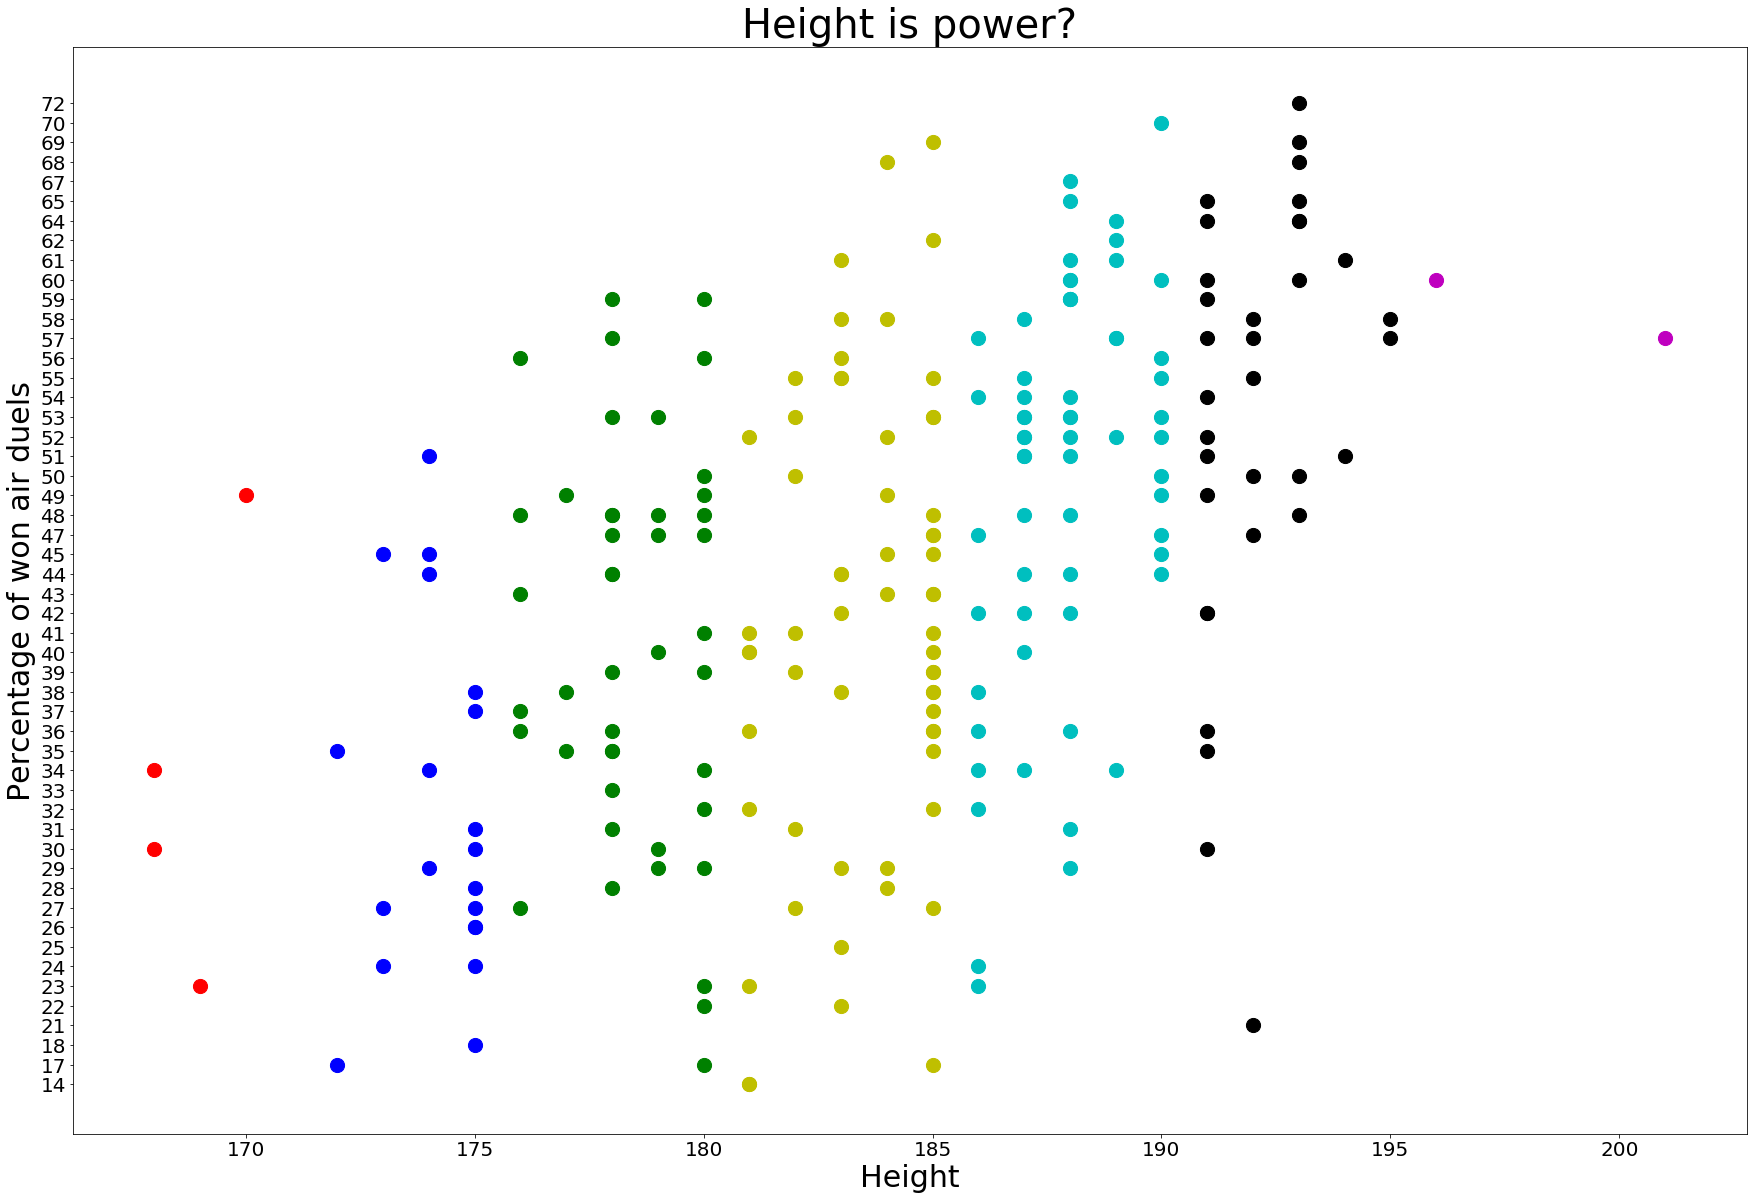

In [7]:
import pandas as pd

data=pd.read_json("events_England.json")
df=pd.DataFrame(data,columns=['subEventName','tags','playerId'])
data1=pd.read_json("players.json")
df1=pd.DataFrame(data1,columns=['lastName','wyId','height',])

d1={}   #total of the air duel for every player
for ind in df.index:
    if (df['subEventName'][ind]=='Air duel'):
        if df['playerId'][ind] not in d1:
            d1[df['playerId'][ind]]=1
        else:
            d1[df['playerId'][ind]]+=1

#a=list(d1.values())
#print(sum(a)/len(a))  #The mean of number of air duels is 76.7. That's why I choosed the threshold 50(to include 'not so great, but trying' players)

for i in d1.keys():  #if the number of air duels for a player is smaller than 50 than make the players value 0
    if d1[i]<50:
        d1[i]=0
newd1={x:y for x,y in d1.items() if y!=0} #eliminate the elements of dict with a value 0 
#new dict of players and the number of air duels higher than specified threshold(50)

d2=[]   #total of air duel for every height

for ind in df1.index:
    if df1['wyId'][ind] in newd1:
         d2.append([df1['wyId'][ind],df1['height'][ind],newd1[df1['wyId'][ind]]])
        

d3={}   #total of the won air duel for every player
for ind in df.index:
    if (df['subEventName'][ind]=='Air duel'):
        if (df['tags'][ind])[0].get('id')==703:
            if df['playerId'][ind] not in d3:
                d3[df['playerId'][ind]]=1
            else:
                d3[df['playerId'][ind]]+=1


d4=[]   #total of won air duel for every height
for ind in df1.index:
    if df1['wyId'][ind] in d3:
        if df1['wyId'][ind] in newd1:
            d4.append([df1['wyId'][ind], df1['height'][ind],d3[df1['wyId'][ind]]])
      
res=[] #percentage of won air duel for every height
for i in range(len(d2)):
    key=d2[i][1]
    res.append([key,format((d4[i][2]/d2[i][2])*100,'.0f')])
res=sorted(res,key=lambda x: x[1])

plt.figure(figsize=(30,20))
for i in range(len(res)):
    if res[i][0] in range(165,171):
        plt.scatter(res[i][0],res[i][1],s=200,c='r')
    elif res[i][0] in range(171,176):
        plt.scatter(res[i][0],res[i][1],s=200,c='b')
    elif res[i][0] in range(176,181):
        plt.scatter(res[i][0],res[i][1],s=200,c='g')
    elif res[i][0] in range(181,186):
        plt.scatter(res[i][0],res[i][1],s=200,c='y')
    elif res[i][0] in range(186,191):
        plt.scatter(res[i][0],res[i][1],s=200,c='c')
    elif res[i][0] in range(191,196):
        plt.scatter(res[i][0],res[i][1],s=200,c='k')
    else:
        plt.scatter(res[i][0],res[i][1],s=200,c='m')
    
    
plt.title('Height is power?',fontsize=40)
plt.xlabel('Height',fontsize=30)
plt.ylabel('Percentage of won air duels',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# RQ6

CIRO IMMOBILE'S SHOTS


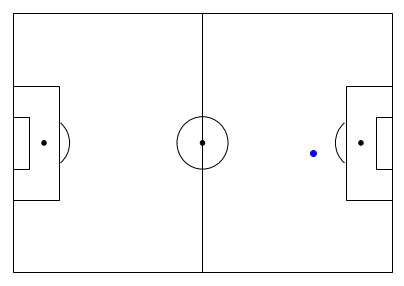

EDIN DZEKO'S SHOTS


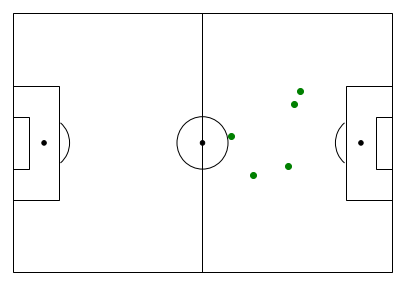

In [17]:
#Derby id: 2576274
#Immobile 21384
#Dzeko 8327
import pandas as pd

data=pd.read_json("events_Italy.json")
df=pd.DataFrame(data,columns=["matchId",'eventName','playerId','positions'])
df1=df[df["matchId"]==2576274]

ciro=df1[df1['playerId']==21384]
ciro=ciro[ciro['eventName']=='Shot']

edin=df1[df1['playerId']==8327]
edin=edin[edin['eventName']=='Shot']

import matplotlib.patches as mp
import matplotlib.pyplot as plt
def draw_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = mp.Rectangle([0,0], width = 120, height = 80, fill = False)
    #Left, Right Penalty Area and midline
    LeftPenalty = mp.Rectangle([0,22.3], width = 14.6, height = 35.3, fill = False)
    RightPenalty = mp.Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)
    midline = mp.ConnectionPatch([60,0], [60,80], "data", "data")

    #Left, Right 6-yard Box
    LeftSixYard = mp.Rectangle([0,32], width = 4.9, height = 16, fill = False)
    RightSixYard = mp.Rectangle([115.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black", fill = False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    #Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")
    leftArc = mp.Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = mp.Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
    
    element = [Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc]
    for i in element:
        ax.add_patch(i)

print("CIRO IMMOBILE'S SHOTS")
fig=plt.figure() #set up the figures
fig.set_size_inches(7,5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('off')
x_coord = [i[0].get('x') for i in ciro["positions"]]
y_coord = [i[0].get('y') for i in ciro["positions"]]
ax.scatter(x_coord, y_coord, c = 'blue', label = 'shots')
plt.show()

print("EDIN DZEKO'S SHOTS")
fig=plt.figure() #set up the figures
fig.set_size_inches(7,5)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('off')
x_coord = [i[0].get('x') for i in edin["positions"]]
y_coord = [i[0].get('y') for i in edin["positions"]]
ax.scatter(x_coord, y_coord, c = 'green', label = 'shots')
plt.show()

# CRQ1.1

[140, 152, 176, 147, 175, 210, 203, 207, 231, 217, 51, 98]


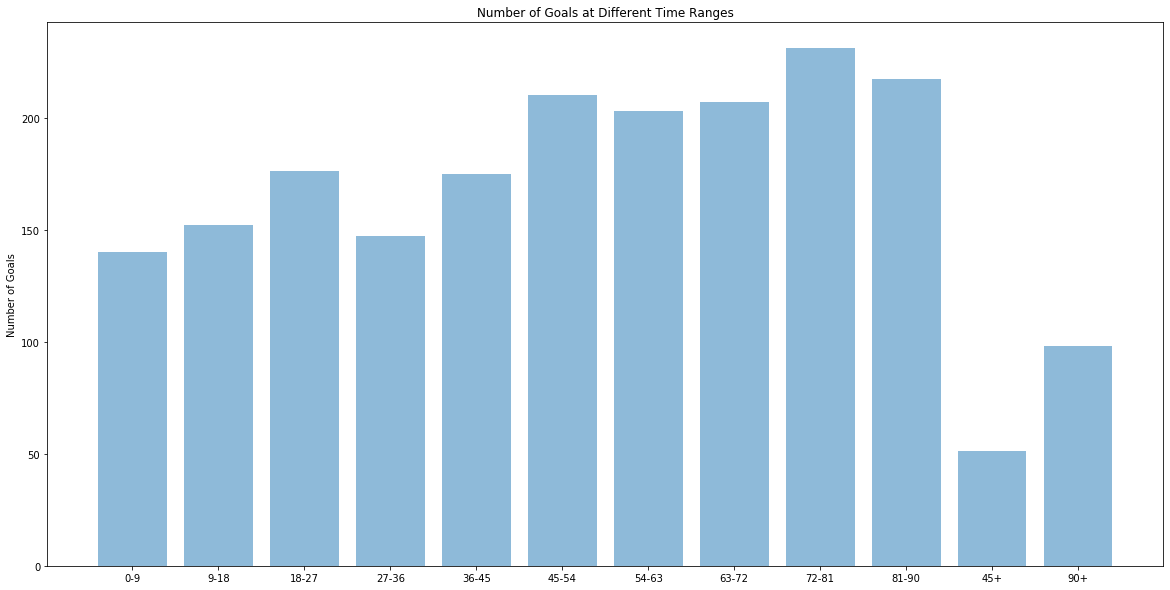

In [13]:
import numpy as np
import pandas as pd
data=pd.read_json("events_England.json")
df=pd.DataFrame(data,columns=['subEventName','tags','playerId', 'eventSec', 'id', 'matchPeriod'])

lst=[]
c=0
b=9
d={}
for ind in df.index:
    for i in range(len(df['tags'][ind])):
      if (df['tags'][ind])[i].get('id')==101:
         lst.append([df['playerId'][ind], df['eventSec'][ind],df['matchPeriod'][ind]])
        
a=0
listo=[0,0,0,0,0,0,0,0,0,0,0,0]
for p in range(5):
 for k in range(len(lst)):
  x= lst[k][1]/60
  if lst[k][2]=='1H':
    if a<=x<b:
        listo[p]+=1
  elif lst[k][2]=='2H':
    if a<=x<b:
        listo[p+5]+=1
 a+=9
 b+=9
for k in range(len(lst)):
  x= lst[k][1]/60  
  if x>45 and lst[k][2]=='1H' :
        listo[10]+=1
  elif x>45 and lst[k][2]=='2H':
        listo[11]+=1    
print(listo)
    
timeranges = ('0-9', '9-18', '18-27', '27-36', '36-45', '45-54','54-63','63-72','72-81','81-90','45+','90+')
y_pos = np.arange(len(timeranges))

plt.figure(figsize=(20,10))
plt.bar(y_pos, listo, align='center', alpha=0.5)
plt.xticks(y_pos, timeranges)
plt.ylabel('Number of Goals')
plt.title('Number of Goals at Different Time Ranges')

plt.show()

## CRQ 1.2 

In [16]:
import numpy as np
import pandas as pd
data=pd.read_json("events_England.json")
df=pd.DataFrame(data,columns=['subEventName','tags','playerId', 'eventSec', 'id', 'matchPeriod', 'teamId'])

lst2=[]
for ind in df.index:
    for i in range(len(df['tags'][ind])):
        if (df['tags'][ind])[i].get('id')==101:
            lst2.append([df['teamId'][ind], df['eventSec'][ind],df['matchPeriod'][ind]])

ee=[]
for i in range(len(lst2)):
    if 36 < lst2[i][1] / 60 < 45 and (lst2[i][2] == '2H'):
        ee.append(lst2[i][0])


count = {i:ee.count(i) for i in ee}
count2 =((sorted(count.items(), key = lambda x: x[1]))[::-1])[:10]


teams= ['Watford FC', 'Arsenal FC','Manchester City FC','West Ham United FC','Crystal Palace FC','Chelsea FC','Swansea City AFC','Everton FC','Liverpool FC','Stoke City FC']
teamid=[]
score=[]
for i in count2:
    score.append(i[1])
    teamid.append(i[0])

most= {'teamId' : teamid, 'Score': score, 'Teams': teams}
themost=pd.DataFrame(most)

print(themost)

   teamId  Score               Teams
0    1644     16          Watford FC
1    1609     16          Arsenal FC
2    1625     15  Manchester City FC
3    1633     15  West Ham United FC
4    1628     13   Crystal Palace FC
5    1610     13          Chelsea FC
6   10531     12    Swansea City AFC
7    1623     12          Everton FC
8    1612     11        Liverpool FC
9    1639     11       Stoke City FC


# CRQ2.1

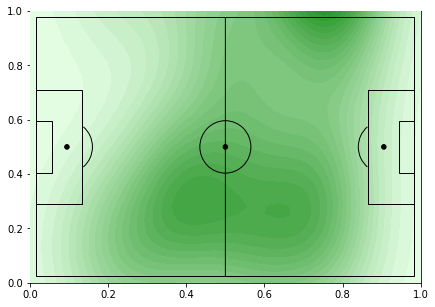

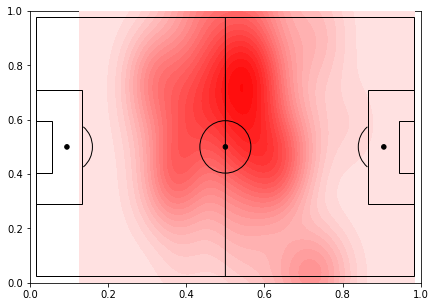

In [9]:
import pandas as pd

data=pd.read_json("events_Spain.json")
df=pd.DataFrame(data,columns=["matchId",'eventName','playerId','positions'])
# Barcelona Real Madrid id: 2565907
# Messi id: 3359
# Ronaldo id: 3322
df1=df[df["matchId"]==2565907]  #focus on the match Barcelona-Real Madrid

ron=df1[df1['playerId']==3322]
ron1=ron[ron['eventName']=='Duel']
ron2=ron[ron['eventName']=='Free Kick']
ron3=ron[ron['eventName']=='Pass']
ron4=ron[ron['eventName']=='Shot']
ronaldo=pd.concat([ron1, ron2, ron3, ron4])   #Cristiano Ronaldo activity

mes=df1[df1['playerId']==3359]
mes1=mes[mes['eventName']=='Duel']
mes2=mes[mes['eventName']=='Free Kick']
mes3=mes[mes['eventName']=='Pass']
mes4=mes[mes['eventName']=='Shot']
messi=pd.concat([mes1,mes2,mes3,mes4])    #Lionel Messi activity

##########  PITCH  ##########

import matplotlib.patches as mp
import matplotlib.pyplot as plt
def draw_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = mp.Rectangle([0,0], width = 120, height = 80, fill = False)
    #Left, Right Penalty Area and midline
    LeftPenalty = mp.Rectangle([0,22.3], width = 14.6, height = 35.3, fill = False)
    RightPenalty = mp.Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)
    midline = mp.ConnectionPatch([60,0], [60,80], "data", "data")

    #Left, Right 6-yard Box
    LeftSixYard = mp.Rectangle([0,32], width = 4.9, height = 16, fill = False)
    RightSixYard = mp.Rectangle([115.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black", fill = False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    #Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")
    leftArc = mp.Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = mp.Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
    
    element = [Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc]
    for i in element:
        ax.add_patch(i)

import seaborn as sns

######Ronaldo's pitch#######

fig, ax = plt.subplots()
fig.set_size_inches(7, 5)

ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('off')

x_coord = [i[0].get('x') for i in ronaldo["positions"]]
y_coord = [i[1].get('y') for i in ronaldo["positions"]]

#shades: give us the heat map we desire
# n_levels: draw more lines, the larger n, the more blurry it looks
sns.kdeplot(x_coord, y_coord, shade = "True", color = "green", n_levels = 30)
plt.show()

#######Messi's pitch ########

fig, ax = plt.subplots()
fig.set_size_inches(7, 5)

ax=fig.add_subplot(1,1,1)
draw_pitch(ax) #overlay our different objects on the pitch
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('off')

x_coord = [i[0].get('x') for i in messi["positions"]]
y_coord = [i[1].get('y') for i in messi["positions"]]

#shades: give us the heat map we desire
# n_levels: draw more lines, the larger n, the more blurry it looks
sns.kdeplot(x_coord, y_coord, shade = "True", color = "red", n_levels = 30)
plt.show()

# CRQ2.2

Jorginho's passes


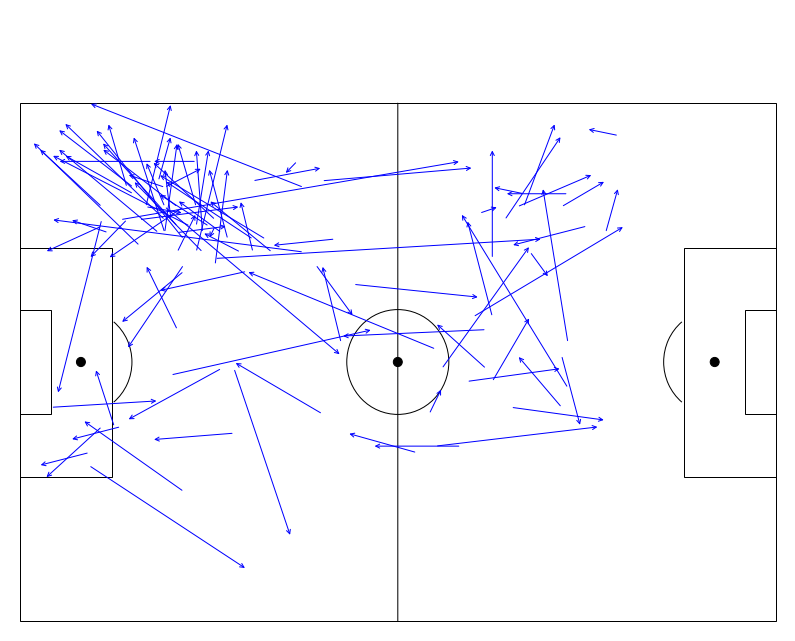


Jorginho's accurated passes


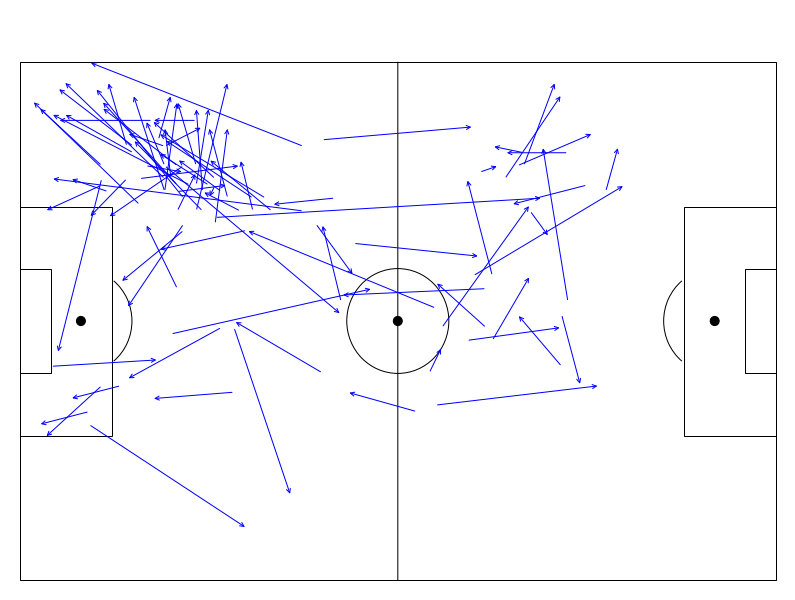


Pjanic's passes


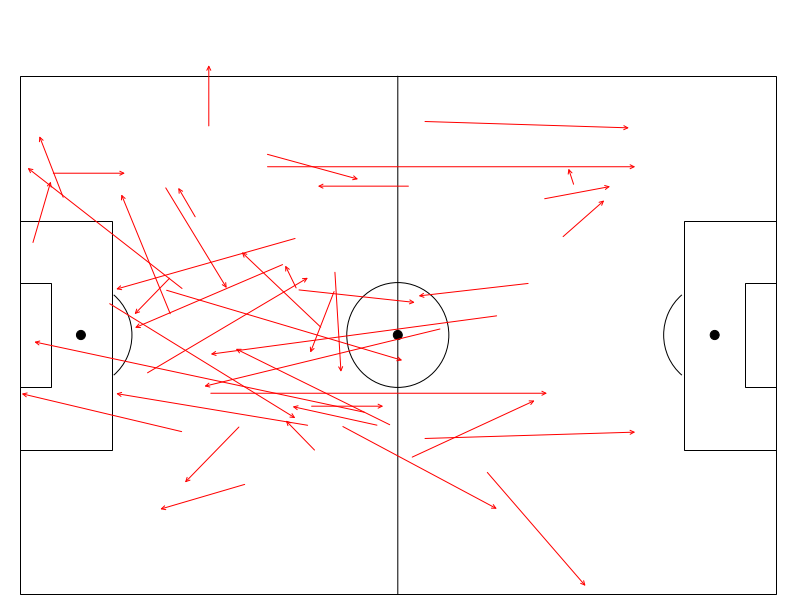


Pjanic's accurated passes


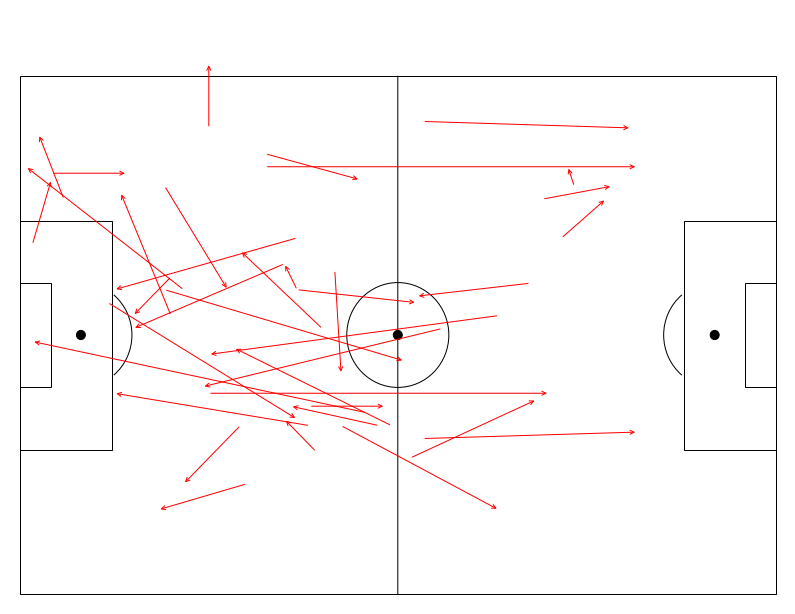

In [10]:
import pandas as pd

data=pd.read_json("events_Italy.json")
df=pd.DataFrame(data,columns=["matchId",'eventName','playerId','positions','tags'])
#Juve - Napoli id: 2576295
#Jorginho 21315
#Pjanic 20443
df1=df[df["matchId"]==2576295]

jor=df1[df1['playerId']==21315]
jor=jor[jor['eventName']=='Pass']
jorok=[]
for ind in jor.index:
    if jor['tags'][ind][0].get('id')==1801:
        jorok.append(jor['positions'][ind])

pja=df1[df1['playerId']==20443]
pja=pja[pja['eventName']=='Pass']
pjaok=[]
for ind in pja.index:
    if pja['tags'][ind][0].get('id')==1801:
        pjaok.append(pja['positions'][ind])

##### PITCH ####

import matplotlib.patches as mp
import matplotlib.pyplot as plt
def draw_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = mp.Rectangle([0,0], width = 120, height = 80, fill = False)
    #Left, Right Penalty Area and midline
    LeftPenalty = mp.Rectangle([0,22.3], width = 14.6, height = 35.3, fill = False)
    RightPenalty = mp.Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)
    midline = mp.ConnectionPatch([60,0], [60,80], "data", "data")

    #Left, Right 6-yard Box
    LeftSixYard = mp.Rectangle([0,32], width = 4.9, height = 16, fill = False)
    RightSixYard = mp.Rectangle([115.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black", fill = False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    #Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")
    leftArc = mp.Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = mp.Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
    
    element = [Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc]
    for i in element:
        ax.add_patch(i)

#####Jorginho#####
print("Jorginho's passes")
fig=plt.figure() 
fig.set_size_inches(14, 10)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax)
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('off')

for el in jor['positions']:
    ax.annotate("", xy=(el[1].get('y'), el[1].get('x')), xycoords='data',
               xytext=(el[0].get('y'), el[0].get('x')), textcoords='data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"))
plt.show()
print()
###accurated passes###
print("Jorginho's accurated passes")
fig=plt.figure() 
fig.set_size_inches(14, 10)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax)
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('off')

for el in jorok:
    ax.annotate("", xy=(el[1].get('y'), el[1].get('x')), xycoords='data',
               xytext=(el[0].get('y'), el[0].get('x')), textcoords='data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"))
plt.show()
print()
#####Pjanic#####
print("Pjanic's passes")
fig=plt.figure()
fig.set_size_inches(14, 10)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax)
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('off')

for el in pja['positions']:
    ax.annotate("", xy=(el[1].get('y'), el[1].get('x')), xycoords='data',
               xytext=(el[0].get('y'), el[0].get('x')), textcoords='data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "red"))
plt.show()
print()
###accurated passes###
print("Pjanic's accurated passes")
fig=plt.figure() 
fig.set_size_inches(14, 10)
ax=fig.add_subplot(1,1,1)
draw_pitch(ax)
plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.axis('off')

for el in pjaok:
    ax.annotate("", xy=(el[1].get('y'), el[1].get('x')), xycoords='data',
               xytext=(el[0].get('y'), el[0].get('x')), textcoords='data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "red"))
plt.show()

In [13]:
#For both players, the difference between the completed passes and the totality is not so much
#They both played concentrated, but Jorginho was more active

# BONUS

## RQ1 Italy

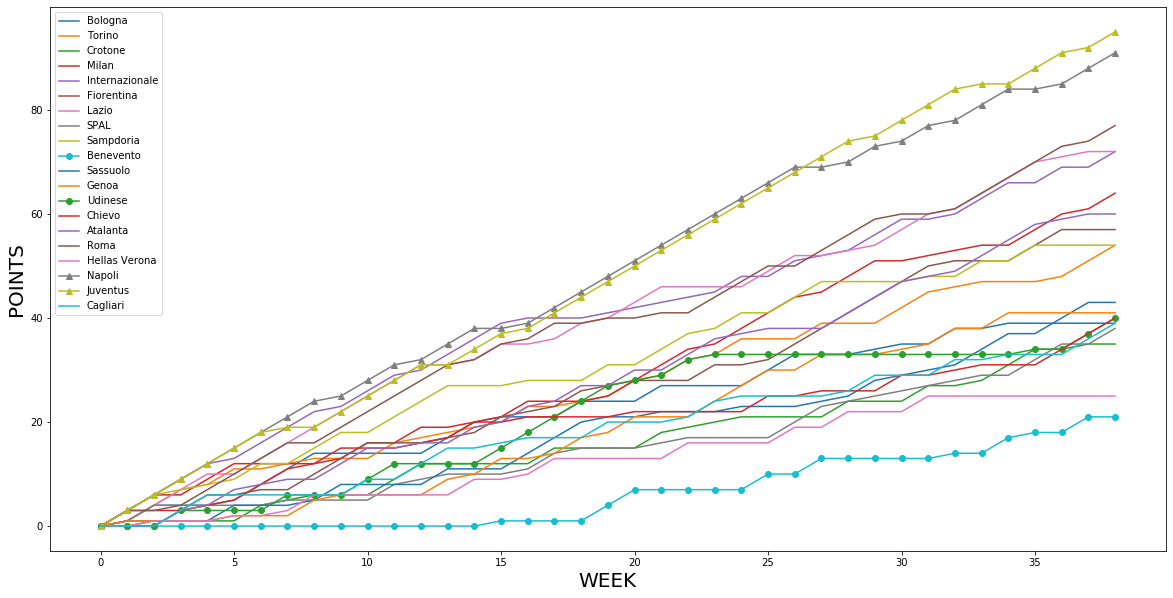

In [16]:
import pandas as pd

data1=pd.read_json("matches_Italy.json")
df=pd.DataFrame(data1,columns=["gameweek","label"])

d={}  #dizionario punteggi

v={}  #dizionario vittorie
l={}  #dizionario sconfitte
record={}  #dizionario record positivo
loses={}  #dizionario record negativo

for i in range(1,39):
    df1=(df[df["gameweek"]==i])     #riduzione database alla singola gameweek
    for el in df1['label']:
        match=(el.split(', '))
        hometeam=((match[0]).split(" - "))[0]
        awayteam=((match[0]).split(" - "))[1]
        homescore=((match[1]).split(" - "))[0]
        awayscore=((match[1]).split(" - "))[1]
        
        if(i==1):  #PRIMAPARTITA
            if homescore>awayscore:   #se vince la squadra di casa
                d[hometeam]=[0,3]
                d[awayteam]=[0,0]
                v[hometeam]=1
                l[hometeam]=0
                v[awayteam]=0
                l[awayteam]=1

            if homescore<awayscore:    #se vince la squadra in trasferta
                d[hometeam]=[0,0]
                d[awayteam]=[0,3]
                v[hometeam]=0
                l[hometeam]=1
                v[awayteam]=1
                l[awayteam]=0
                
                
            if homescore==awayscore:    #se le squadre pareggiano
                d[hometeam]=[0,1]
                d[awayteam]=[0,1]
                v[hometeam]=0
                l[hometeam]=0
                v[awayteam]=0
                l[awayteam]=0
                
            record[hometeam]=v[hometeam]     #inizializzazione records
            record[awayteam]=v[awayteam]
            loses[hometeam]=l[hometeam]
            loses[awayteam]=l[awayteam]
                
########################################################################           
                
        if(i>1):   #ALTREPARTITE
            if homescore>awayscore:   #se vince la squadra di casa
                d[hometeam].append(d[hometeam][-1]+3)
                d[awayteam].append(d[awayteam][-1])
                v[hometeam]+=1
                l[hometeam]=0
                v[awayteam]=0
                l[awayteam]+=1
                
            if homescore<awayscore:    #se vince la squadra in trasferta
                d[hometeam].append(d[hometeam][-1])
                d[awayteam].append(d[awayteam][-1]+3)
                v[hometeam]=0
                l[hometeam]+=1
                v[awayteam]+=1
                l[awayteam]=0
                
            if homescore==awayscore:    #se le squadre pareggiano
                d[hometeam].append(d[hometeam][-1]+1)
                d[awayteam].append(d[awayteam][-1]+1)
                v[hometeam]=0
                l[hometeam]=0
                v[awayteam]=0
                l[awayteam]=0
                
            if v[hometeam]>record[hometeam]:   #aggiornamento record positivi
                record[hometeam]=v[hometeam]
            if v[awayteam]>record[awayteam]:
                record[awayteam]=v[awayteam]
            if l[hometeam]>loses[hometeam]:    #aggiornamento record negativi
                loses[hometeam]=l[hometeam]
            if l[awayteam]>loses[awayteam]:
                loses[awayteam]=l[awayteam]


                
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

for key in d:
    if (record[key]==sorted(record.values())[-1])or(record[key]==sorted(record.values())[-2]):
        p=plt.plot(range(39), d[key],'-^')
    
    elif (loses[key]==sorted(loses.values())[-1])or(loses[key]==sorted(loses.values())[-2]):
        p=plt.plot(range(39), d[key],'-o')
    
    else:   
        p=plt.plot(range(39), d[key])                                           

plt.legend(d.keys())

plt.ylabel('POINTS',fontsize=20)
plt.xlabel('WEEK',fontsize=20)
plt.show()

## RQ1 France

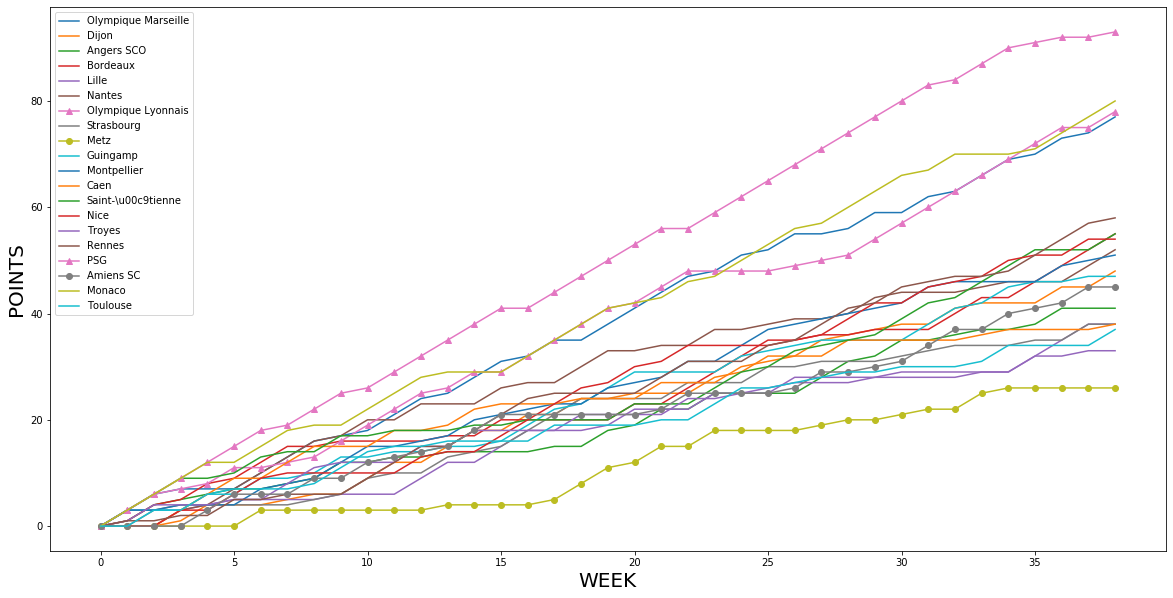

In [18]:
import pandas as pd

data1=pd.read_json(r"matches_France.json")
df=pd.DataFrame(data1,columns=["gameweek","label"])

d={}  #dizionario punteggi

v={}  #dizionario vittorie
l={}  #dizionario sconfitte
record={}  #dizionario record positivo
loses={}  #dizionario record negativo

for i in range(1,39):
    df1=(df[df["gameweek"]==i])     #riduzione database alla singola gameweek
    for el in df1['label']:
        match=(el.split(', '))
        hometeam=((match[0]).split(" - "))[0]
        awayteam=((match[0]).split(" - "))[1]
        homescore=((match[1]).split(" - "))[0]
        awayscore=((match[1]).split(" - "))[1]
        
        if(i==1):  #PRIMAPARTITA
            if homescore>awayscore:   #se vince la squadra di casa
                d[hometeam]=[0,3]
                d[awayteam]=[0,0]
                v[hometeam]=1
                l[hometeam]=0
                v[awayteam]=0
                l[awayteam]=1

            if homescore<awayscore:    #se vince la squadra in trasferta
                d[hometeam]=[0,0]
                d[awayteam]=[0,3]
                v[hometeam]=0
                l[hometeam]=1
                v[awayteam]=1
                l[awayteam]=0
                
                
            if homescore==awayscore:    #se le squadre pareggiano
                d[hometeam]=[0,1]
                d[awayteam]=[0,1]
                v[hometeam]=0
                l[hometeam]=0
                v[awayteam]=0
                l[awayteam]=0
                
            record[hometeam]=v[hometeam]     #inizializzazione records
            record[awayteam]=v[awayteam]
            loses[hometeam]=l[hometeam]
            loses[awayteam]=l[awayteam]
                
########################################################################           
                
        if(i>1):   #ALTREPARTITE
            if homescore>awayscore:   #se vince la squadra di casa
                d[hometeam].append(d[hometeam][-1]+3)
                d[awayteam].append(d[awayteam][-1])
                v[hometeam]+=1
                l[hometeam]=0
                v[awayteam]=0
                l[awayteam]+=1
                
            if homescore<awayscore:    #se vince la squadra in trasferta
                d[hometeam].append(d[hometeam][-1])
                d[awayteam].append(d[awayteam][-1]+3)
                v[hometeam]=0
                l[hometeam]+=1
                v[awayteam]+=1
                l[awayteam]=0
                
            if homescore==awayscore:    #se le squadre pareggiano
                d[hometeam].append(d[hometeam][-1]+1)
                d[awayteam].append(d[awayteam][-1]+1)
                v[hometeam]=0
                l[hometeam]=0
                v[awayteam]=0
                l[awayteam]=0
                
            if v[hometeam]>record[hometeam]:   #aggiornamento record positivi
                record[hometeam]=v[hometeam]
            if v[awayteam]>record[awayteam]:
                record[awayteam]=v[awayteam]
            if l[hometeam]>loses[hometeam]:    #aggiornamento record negativi
                loses[hometeam]=l[hometeam]
            if l[awayteam]>loses[awayteam]:
                loses[awayteam]=l[awayteam]


                
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

for key in d:
    if (record[key]==sorted(record.values())[-1])or(record[key]==sorted(record.values())[-2]):
        p=plt.plot(range(39), d[key],'-^')
    
    elif (loses[key]==sorted(loses.values())[-1])or(loses[key]==sorted(loses.values())[-2]):
        p=plt.plot(range(39), d[key],'-o')
    
    else:   
        p=plt.plot(range(39), d[key])                                           

plt.legend(d.keys())

plt.ylabel('POINTS',fontsize=20)
plt.xlabel('WEEK',fontsize=20)
plt.show()

## RQ1 Spain 

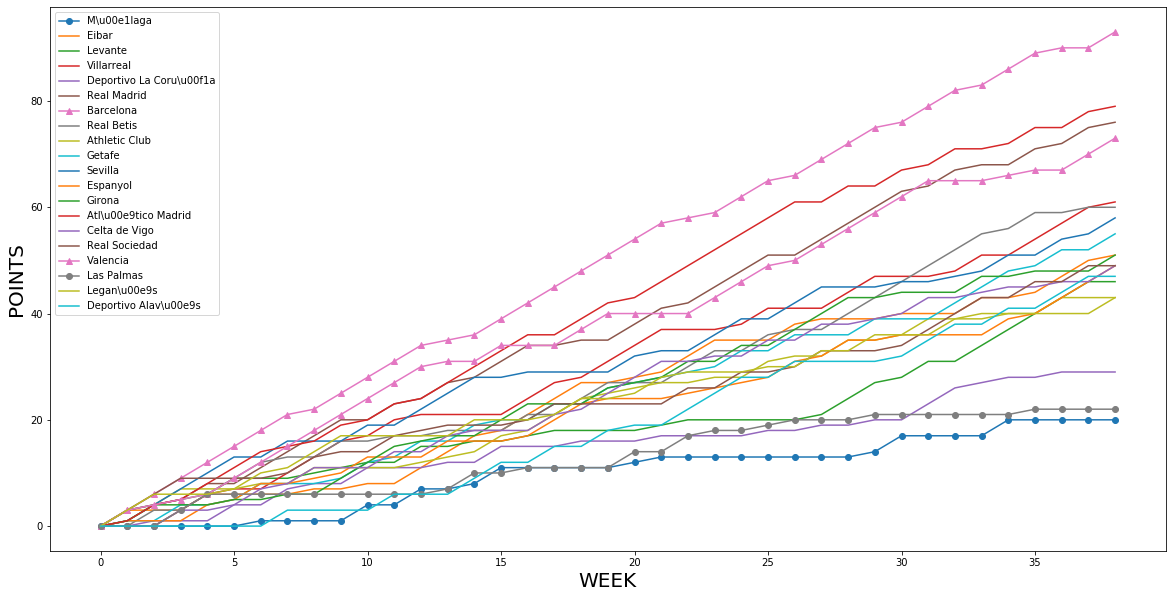

In [19]:
import pandas as pd

data1=pd.read_json(r"matches_Spain.json")
df=pd.DataFrame(data1,columns=["gameweek","label"])

d={}  #dizionario punteggi

v={}  #dizionario vittorie
l={}  #dizionario sconfitte
record={}  #dizionario record positivo
loses={}  #dizionario record negativo

for i in range(1,39):
    df1=(df[df["gameweek"]==i])     #riduzione database alla singola gameweek
    for el in df1['label']:
        match=(el.split(', '))
        hometeam=((match[0]).split(" - "))[0]
        awayteam=((match[0]).split(" - "))[1]
        homescore=((match[1]).split(" - "))[0]
        awayscore=((match[1]).split(" - "))[1]
        
        if(i==1):  #PRIMAPARTITA
            if homescore>awayscore:   #se vince la squadra di casa
                d[hometeam]=[0,3]
                d[awayteam]=[0,0]
                v[hometeam]=1
                l[hometeam]=0
                v[awayteam]=0
                l[awayteam]=1

            if homescore<awayscore:    #se vince la squadra in trasferta
                d[hometeam]=[0,0]
                d[awayteam]=[0,3]
                v[hometeam]=0
                l[hometeam]=1
                v[awayteam]=1
                l[awayteam]=0
                
                
            if homescore==awayscore:    #se le squadre pareggiano
                d[hometeam]=[0,1]
                d[awayteam]=[0,1]
                v[hometeam]=0
                l[hometeam]=0
                v[awayteam]=0
                l[awayteam]=0
                
            record[hometeam]=v[hometeam]     #inizializzazione records
            record[awayteam]=v[awayteam]
            loses[hometeam]=l[hometeam]
            loses[awayteam]=l[awayteam]
                
########################################################################           
                
        if(i>1):   #ALTREPARTITE
            if homescore>awayscore:   #se vince la squadra di casa
                d[hometeam].append(d[hometeam][-1]+3)
                d[awayteam].append(d[awayteam][-1])
                v[hometeam]+=1
                l[hometeam]=0
                v[awayteam]=0
                l[awayteam]+=1
                
            if homescore<awayscore:    #se vince la squadra in trasferta
                d[hometeam].append(d[hometeam][-1])
                d[awayteam].append(d[awayteam][-1]+3)
                v[hometeam]=0
                l[hometeam]+=1
                v[awayteam]+=1
                l[awayteam]=0
                
            if homescore==awayscore:    #se le squadre pareggiano
                d[hometeam].append(d[hometeam][-1]+1)
                d[awayteam].append(d[awayteam][-1]+1)
                v[hometeam]=0
                l[hometeam]=0
                v[awayteam]=0
                l[awayteam]=0
                
            if v[hometeam]>record[hometeam]:   #aggiornamento record positivi
                record[hometeam]=v[hometeam]
            if v[awayteam]>record[awayteam]:
                record[awayteam]=v[awayteam]
            if l[hometeam]>loses[hometeam]:    #aggiornamento record negativi
                loses[hometeam]=l[hometeam]
            if l[awayteam]>loses[awayteam]:
                loses[awayteam]=l[awayteam]


                
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

for key in d:
    if (record[key]==sorted(record.values())[-1])or(record[key]==sorted(record.values())[-2]):
        p=plt.plot(range(39), d[key],'-^')
    
    elif (loses[key]==sorted(loses.values())[-1])or(loses[key]==sorted(loses.values())[-2]):
        p=plt.plot(range(39), d[key],'-o')
    
    else:   
        p=plt.plot(range(39), d[key])                                           

plt.legend(d.keys())

plt.ylabel('POINTS',fontsize=20)
plt.xlabel('WEEK',fontsize=20)
plt.show()

## RQ2 Italy

In [20]:
import pandas as pd

data1=pd.read_json("matches_Italy.json")
df=pd.DataFrame(data1,columns=["gameweek","label"])

h={}  #home dictionary
a={}  #away dictionary


for i in range(1,39):
    df1=(df[df["gameweek"]==i])     
    for el in df1['label']:
        match=(el.split(', '))
        hometeam=((match[0]).split(" - "))[0]
        awayteam=((match[0]).split(" - "))[1]
        homescore=((match[1]).split(" - "))[0]
        awayscore=((match[1]).split(" - "))[1]
        
        if homescore>awayscore:   #if hometeam wins
            if hometeam not in h:
                h[hometeam]=[1,0,0]
                
            else:
                h[hometeam][0]+=1 
                
            if awayteam not in a:
                a[awayteam]=[0,0,1]
            else:
                a[awayteam][2]+=1
                
        if homescore<awayscore:    #if awayteam wins
            if hometeam not in h:
                h[hometeam]=[0,0,1]
            else:
                h[hometeam][2]+=1
            if awayteam not in a:
                a[awayteam]=[1,0,0]
            else:
                a[awayteam][0]+=1
                
        if homescore==awayscore:    #it's a draw!
            if hometeam not in h:
                h[hometeam]=[0,1,0]
            else:
                h[hometeam][1]+=1
            if awayteam not in a:
                a[awayteam]=[0,1,0]
            else:
                a[awayteam][1]+=1
                

##########################

l=[]     #premier league list
for key in h:
    l.append(key)

from scipy.stats import chi2_contingency
from scipy.stats import chi2

for i in range(5):
    table= [h[l[i]],a[l[i]]]

    table=pd.DataFrame(table,columns=['Victories','Draws','Loses'],index=['Home','Away'])
    print(l[i])
    print(table)
 
    #interpret test-statistic
    stat, p, dof, expected = chi2_contingency(table) 
    prob = 0.95
    alpha = 1.0 - prob #our alfa level is 0,05
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (accept H0)')
    critical = chi2.ppf(prob, dof) 
    chi2_contingency(table) #test statistic, p-value, degrees of freedom, expected frequencies
    print()

#H0 = there is no home-field advantage (the two variables are independent) 
#H1 = there is an home-field advantage

#If the p-value is less than or equal to the alpha (p< 0.05), then we reject the null hypothesis. 
#If the p-value is greater than alpha (p > 0.05), then we accept the null hypothesis.

Bologna
      Victories  Draws  Loses
Home          6      4      9
Away          5      2     12
Independent (accept H0)

Crotone
      Victories  Draws  Loses
Home          6      6      7
Away          3      2     14
Independent (accept H0)

Internazionale
      Victories  Draws  Loses
Home         11      5      3
Away          9      7      3
Independent (accept H0)

Lazio
      Victories  Draws  Loses
Home          9      5      5
Away         12      4      3
Independent (accept H0)

Sampdoria
      Victories  Draws  Loses
Home         12      3      4
Away          4      3     12
Dependent (reject H0)



## RQ2 France

In [21]:
import pandas as pd

data1=pd.read_json("matches_France.json")
df=pd.DataFrame(data1,columns=["gameweek","label"])

h={}  #home dictionary
a={}  #away dictionary


for i in range(1,39):
    df1=(df[df["gameweek"]==i])     
    for el in df1['label']:
        match=(el.split(', '))
        hometeam=((match[0]).split(" - "))[0]
        awayteam=((match[0]).split(" - "))[1]
        homescore=((match[1]).split(" - "))[0]
        awayscore=((match[1]).split(" - "))[1]
        
        if homescore>awayscore:   #if hometeam wins
            if hometeam not in h:
                h[hometeam]=[1,0,0]
                
            else:
                h[hometeam][0]+=1 
                
            if awayteam not in a:
                a[awayteam]=[0,0,1]
            else:
                a[awayteam][2]+=1
                
        if homescore<awayscore:    #if awayteam wins
            if hometeam not in h:
                h[hometeam]=[0,0,1]
            else:
                h[hometeam][2]+=1
            if awayteam not in a:
                a[awayteam]=[1,0,0]
            else:
                a[awayteam][0]+=1
                
        if homescore==awayscore:    #it's a draw!
            if hometeam not in h:
                h[hometeam]=[0,1,0]
            else:
                h[hometeam][1]+=1
            if awayteam not in a:
                a[awayteam]=[0,1,0]
            else:
                a[awayteam][1]+=1
                

##########################

l=[]     #premier league list
for key in h:
    l.append(key)

from scipy.stats import chi2_contingency
from scipy.stats import chi2

for i in range(5):
    table= [h[l[i]],a[l[i]]]

    table=pd.DataFrame(table,columns=['Victories','Draws','Loses'],index=['Home','Away'])
    print(l[i])
    print(table)
 
    #interpret test-statistic
    stat, p, dof, expected = chi2_contingency(table) 
    prob = 0.95
    alpha = 1.0 - prob #our alfa level is 0,05
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (accept H0)')
    critical = chi2.ppf(prob, dof) 
    chi2_contingency(table) #test statistic, p-value, degrees of freedom, expected frequencies
    print()

#H0 = there is no home-field advantage (the two variables are independent) 
#H1 = there is an home-field advantage

#If the p-value is less than or equal to the alpha (p< 0.05), then we reject the null hypothesis. 
#If the p-value is greater than alpha (p > 0.05), then we accept the null hypothesis.
 

Olympique Marseille
      Victories  Draws  Loses
Home         12      5      2
Away         10      6      3
Independent (accept H0)

Angers SCO
      Victories  Draws  Loses
Home          5      7      7
Away          4      7      8
Independent (accept H0)

Lille
      Victories  Draws  Loses
Home          6      6      7
Away          4      2     13
Independent (accept H0)

Olympique Lyonnais
      Victories  Draws  Loses
Home         12      5      2
Away         11      4      4
Independent (accept H0)

Metz
      Victories  Draws  Loses
Home          3      4     12
Away          3      4     12
Independent (accept H0)



## RQ2 Spain

In [25]:
import pandas as pd

data1=pd.read_json("matches_Spain.json")
df=pd.DataFrame(data1,columns=["gameweek","label"])

h={}  #home dictionary
a={}  #away dictionary


for i in range(1,39):
    df1=(df[df["gameweek"]==i])     
    for el in df1['label']:
        match=(el.split(', '))
        hometeam=((match[0]).split(" - "))[0]
        awayteam=((match[0]).split(" - "))[1]
        homescore=((match[1]).split(" - "))[0]
        awayscore=((match[1]).split(" - "))[1]
        
        if homescore>awayscore:   #if hometeam wins
            if hometeam not in h:
                h[hometeam]=[1,0,0]
                
            else:
                h[hometeam][0]+=1 
                
            if awayteam not in a:
                a[awayteam]=[0,0,1]
            else:
                a[awayteam][2]+=1
                
        if homescore<awayscore:    #if awayteam wins
            if hometeam not in h:
                h[hometeam]=[0,0,1]
            else:
                h[hometeam][2]+=1
            if awayteam not in a:
                a[awayteam]=[1,0,0]
            else:
                a[awayteam][0]+=1
                
        if homescore==awayscore:    #it's a draw!
            if hometeam not in h:
                h[hometeam]=[0,1,0]
            else:
                h[hometeam][1]+=1
            if awayteam not in a:
                a[awayteam]=[0,1,0]
            else:
                a[awayteam][1]+=1
                

##########################

l=[]     #premier league list
for key in h:
    l.append(key)

from scipy.stats import chi2_contingency
from scipy.stats import chi2

for i in range(5):
    table= [h[l[i]],a[l[i]]]

    table=pd.DataFrame(table,columns=['Victories','Draws','Loses'],index=['Home','Away'])
    print(l[i])
    print(table)
 
    #interpret test-statistic
    stat, p, dof, expected = chi2_contingency(table) 
    prob = 0.95
    alpha = 1.0 - prob #our alfa level is 0,05
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (accept H0)')
    critical = chi2.ppf(prob, dof) 
    chi2_contingency(table) #test statistic, p-value, degrees of freedom, expected frequencies
    print()

#H0 = there is no home-field advantage (the two variables are independent) 
#H1 = there is an home-field advantage

#If the p-value is less than or equal to the alpha (p< 0.05), then we reject the null hypothesis. 
#If the p-value is greater than alpha (p > 0.05), then we accept the null hypothesis.


M\u00e1laga
      Victories  Draws  Loses
Home          4      3     12
Away          1      2     16
Independent (accept H0)

Levante
      Victories  Draws  Loses
Home          7      6      6
Away          4      7      8
Independent (accept H0)

Deportivo La Coru\u00f1a
      Victories  Draws  Loses
Home          4      6      9
Away          2      5     12
Independent (accept H0)

Barcelona
      Victories  Draws  Loses
Home         16      3      0
Away         12      6      1
Independent (accept H0)

Athletic Club
      Victories  Draws  Loses
Home          6      8      5
Away          4      5     10
Independent (accept H0)



## RQ4 Italy

In [3]:
import pandas as pd

data=pd.read_json("events_italy.json")
df=pd.DataFrame(data,columns=['eventName','tags','playerId'])

d={} #total passes for every player
for ind in df.index:
    if (df['eventName'][ind]=='Pass'):
        if df['playerId'][ind] not in d:
             d[df['playerId'][ind]]=1
        else:
             d[df['playerId'][ind]]+=1

d1={}  #total accurated passes for every player
for ind in df.index:
    if (df['eventName'][ind]=='Pass'):
        if (df['tags'][ind])[0].get('id')==1801:
            if df['playerId'][ind] not in d1:
                 d1[df['playerId'][ind]]=1
            else:
                 d1[df['playerId'][ind]]+=1

d2={}   #percentage of accurated passes for every player 
for key in d:
    if d[key]>76:   #minimun values is two passes for match
        d2[key]=format((d1[key]/d[key])*100,'.2f')

data1=pd.read_json("players.json")
df1=pd.DataFrame(data1,columns=['lastName','wyId'])

results=[]
for ind in df1.index:
    if df1['wyId'][ind] in d2:
        if d2[df1['wyId'][ind]] in (sorted(d2.values())[-10:]):
            
            results.append([df1['lastName'][ind],d2[df1['wyId'][ind]]+'%'])
            
print (results)


[['Rugani', '91.36%'], ['Moreno Herrera', '91.88%'], ['Diawara', '90.09%'], ['H\\u00f6wedes', '89.90%'], ['Chiriche\\u0219', '90.28%'], ['Barzagli', '90.85%'], ['El Mouttaqi Benatia', '89.99%'], ['Tonelli', '90.95%'], ['Koulibaly', '90.24%'], ['Danzi', '90.32%']]


## RQ4 France

In [2]:
import pandas as pd

data=pd.read_json("events_France.json")
df=pd.DataFrame(data,columns=['eventName','tags','playerId'])

d={} #total passes for every player
for ind in df.index:
    if (df['eventName'][ind]=='Pass'):
        if df['playerId'][ind] not in d:
             d[df['playerId'][ind]]=1
        else:
             d[df['playerId'][ind]]+=1

d1={}  #total accurated passes for every player
for ind in df.index:
    if (df['eventName'][ind]=='Pass'):
        if (df['tags'][ind])[0].get('id')==1801:
            if df['playerId'][ind] not in d1:
                 d1[df['playerId'][ind]]=1
            else:
                 d1[df['playerId'][ind]]+=1

d2={}   #percentage of accurated passes for every player 
for key in d:
    if d[key]>76:   #minimun values is two passes for match
        d2[key]=format((d1[key]/d[key])*100,'.2f')

data1=pd.read_json("players.json")
df1=pd.DataFrame(data1,columns=['lastName','wyId'])

results=[]
for ind in df1.index:
    if df1['wyId'][ind] in d2:
        if d2[df1['wyId'][ind]] in (sorted(d2.values())[-10:]):
            
            results.append([df1['lastName'][ind],d2[df1['wyId'][ind]]+'%'])
print (results)      
            


[['Kimpembe', '92.22%'], ['Diarra', '90.68%'], ['Santos da Silva Barbosa', '93.15%'], ['Ao\\u00e1s Corr\\u00eaa ', '90.77%'], ['Cardinale', '90.66%'], ['da Silva', '92.95%'], ['Mendy', '90.81%'], ['Abdennour', '91.54%'], ['Yanga-Mbiwa', '92.00%'], ['Ribelin', '94.05%']]


## RQ4 Spain

In [1]:
import pandas as pd

data=pd.read_json("events_Spain.json")
df=pd.DataFrame(data,columns=['eventName','tags','playerId'])

d={} #total passes for every player
for ind in df.index:
    if (df['eventName'][ind]=='Pass'):
        if df['playerId'][ind] not in d:
             d[df['playerId'][ind]]=1
        else:
             d[df['playerId'][ind]]+=1

d1={}  #total accurated passes for every player
for ind in df.index:
    if (df['eventName'][ind]=='Pass'):
        if (df['tags'][ind])[0].get('id')==1801:
            if df['playerId'][ind] not in d1:
                 d1[df['playerId'][ind]]=1
            else:
                 d1[df['playerId'][ind]]+=1

d2={}   #percentage of accurated passes for every player 
for key in d:
    if d[key]>76:   #minimun values is two passes for match
        d2[key]=format((d1[key]/d[key])*100,'.2f')

data1=pd.read_json("players.json")
df1=pd.DataFrame(data1,columns=['lastName','wyId'])

results=[]
for ind in df1.index:
    if df1['wyId'][ind] in d2:
        if d2[df1['wyId'][ind]] in (sorted(d2.values())[-10:]):
            
            results.append([df1['lastName'][ind],d2[df1['wyId'][ind]]+'%'])
            
print (results)

[['Amat Maas', '90.12%'], ['Kova\\u010di\\u0107', '90.90%'], ['Garc\\u00eda Fern\\u00e1ndez', '91.07%'], ['Vermaelen', '91.56%'], ['Kroos', '89.94%'], ['Llorente Moreno', '91.65%'], ['Mascherano', '88.84%'], ['Mandi', '90.54%'], ['Mina Gonz\\u00e1lez', '93.42%'], ['Ceballos Fern\\u00e1ndez', '90.93%']]


## RQ5 Italy

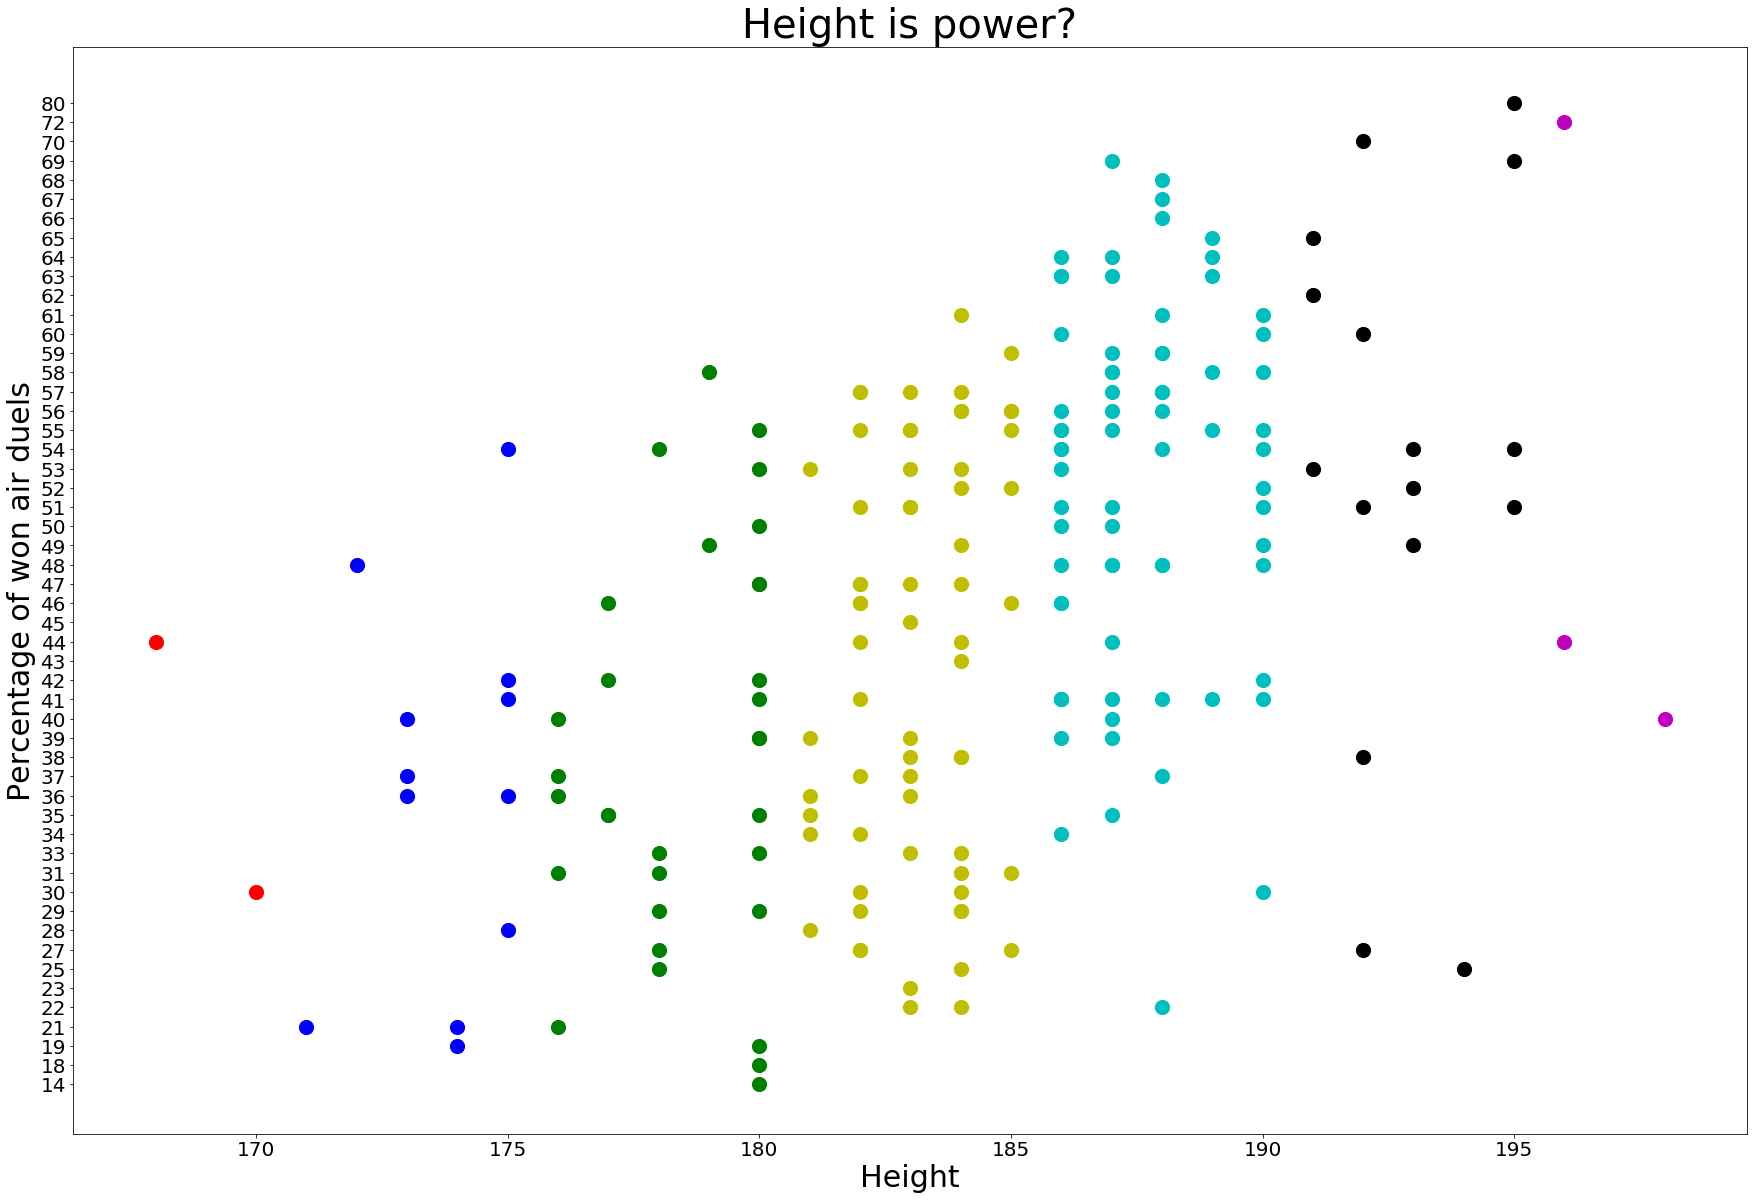

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_json("events_Italy.json")
df=pd.DataFrame(data,columns=['subEventName','tags','playerId'])
data1=pd.read_json("players.json")
df1=pd.DataFrame(data1,columns=['lastName','wyId','height',])

d1={}   #total of the air duel for every player
for ind in df.index:
    if (df['subEventName'][ind]=='Air duel'):
        if df['playerId'][ind] not in d1:
            d1[df['playerId'][ind]]=1
        else:
            d1[df['playerId'][ind]]+=1

#a=list(d1.values())
#print(sum(a)/len(a))  #The mean of number of air duels is 76.7. That's why I choosed the threshold 50(to include 'not so great, but trying' players)

for i in d1.keys():  #if the number of air duels for a player is smaller than 50 than make the players value 0
    if d1[i]<50:
        d1[i]=0
newd1={x:y for x,y in d1.items() if y!=0} #eliminate the elements of dict with a value 0 
#new dict of players and the number of air duels higher than specified threshold(50)

d2=[]   #total of air duel for every height

for ind in df1.index:
    if df1['wyId'][ind] in newd1:
         d2.append([df1['wyId'][ind],df1['height'][ind],newd1[df1['wyId'][ind]]])
        

d3={}   #total of the won air duel for every player
for ind in df.index:
    if (df['subEventName'][ind]=='Air duel'):
        if (df['tags'][ind])[0].get('id')==703:
            if df['playerId'][ind] not in d3:
                d3[df['playerId'][ind]]=1
            else:
                d3[df['playerId'][ind]]+=1


d4=[]   #total of won air duel for every height
for ind in df1.index:
    if df1['wyId'][ind] in d3:
        if df1['wyId'][ind] in newd1:
            d4.append([df1['wyId'][ind], df1['height'][ind],d3[df1['wyId'][ind]]])
      
res=[] #percentage of won air duel for every height
for i in range(len(d2)):
    key=d2[i][1]
    res.append([key,format((d4[i][2]/d2[i][2])*100,'.0f')])
res=sorted(res,key=lambda x: x[1])

plt.figure(figsize=(30,20))
for i in range(len(res)):
    if res[i][0] in range(165,171):
        plt.scatter(res[i][0],res[i][1],s=200,c='r')
    elif res[i][0] in range(171,176):
        plt.scatter(res[i][0],res[i][1],s=200,c='b')
    elif res[i][0] in range(176,181):
        plt.scatter(res[i][0],res[i][1],s=200,c='g')
    elif res[i][0] in range(181,186):
        plt.scatter(res[i][0],res[i][1],s=200,c='y')
    elif res[i][0] in range(186,191):
        plt.scatter(res[i][0],res[i][1],s=200,c='c')
    elif res[i][0] in range(191,196):
        plt.scatter(res[i][0],res[i][1],s=200,c='k')
    else:
        plt.scatter(res[i][0],res[i][1],s=200,c='m')
    
    
plt.title('Height is power?',fontsize=40)
plt.xlabel('Height',fontsize=30)
plt.ylabel('Percentage of won air duels',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

## RQ5 France 

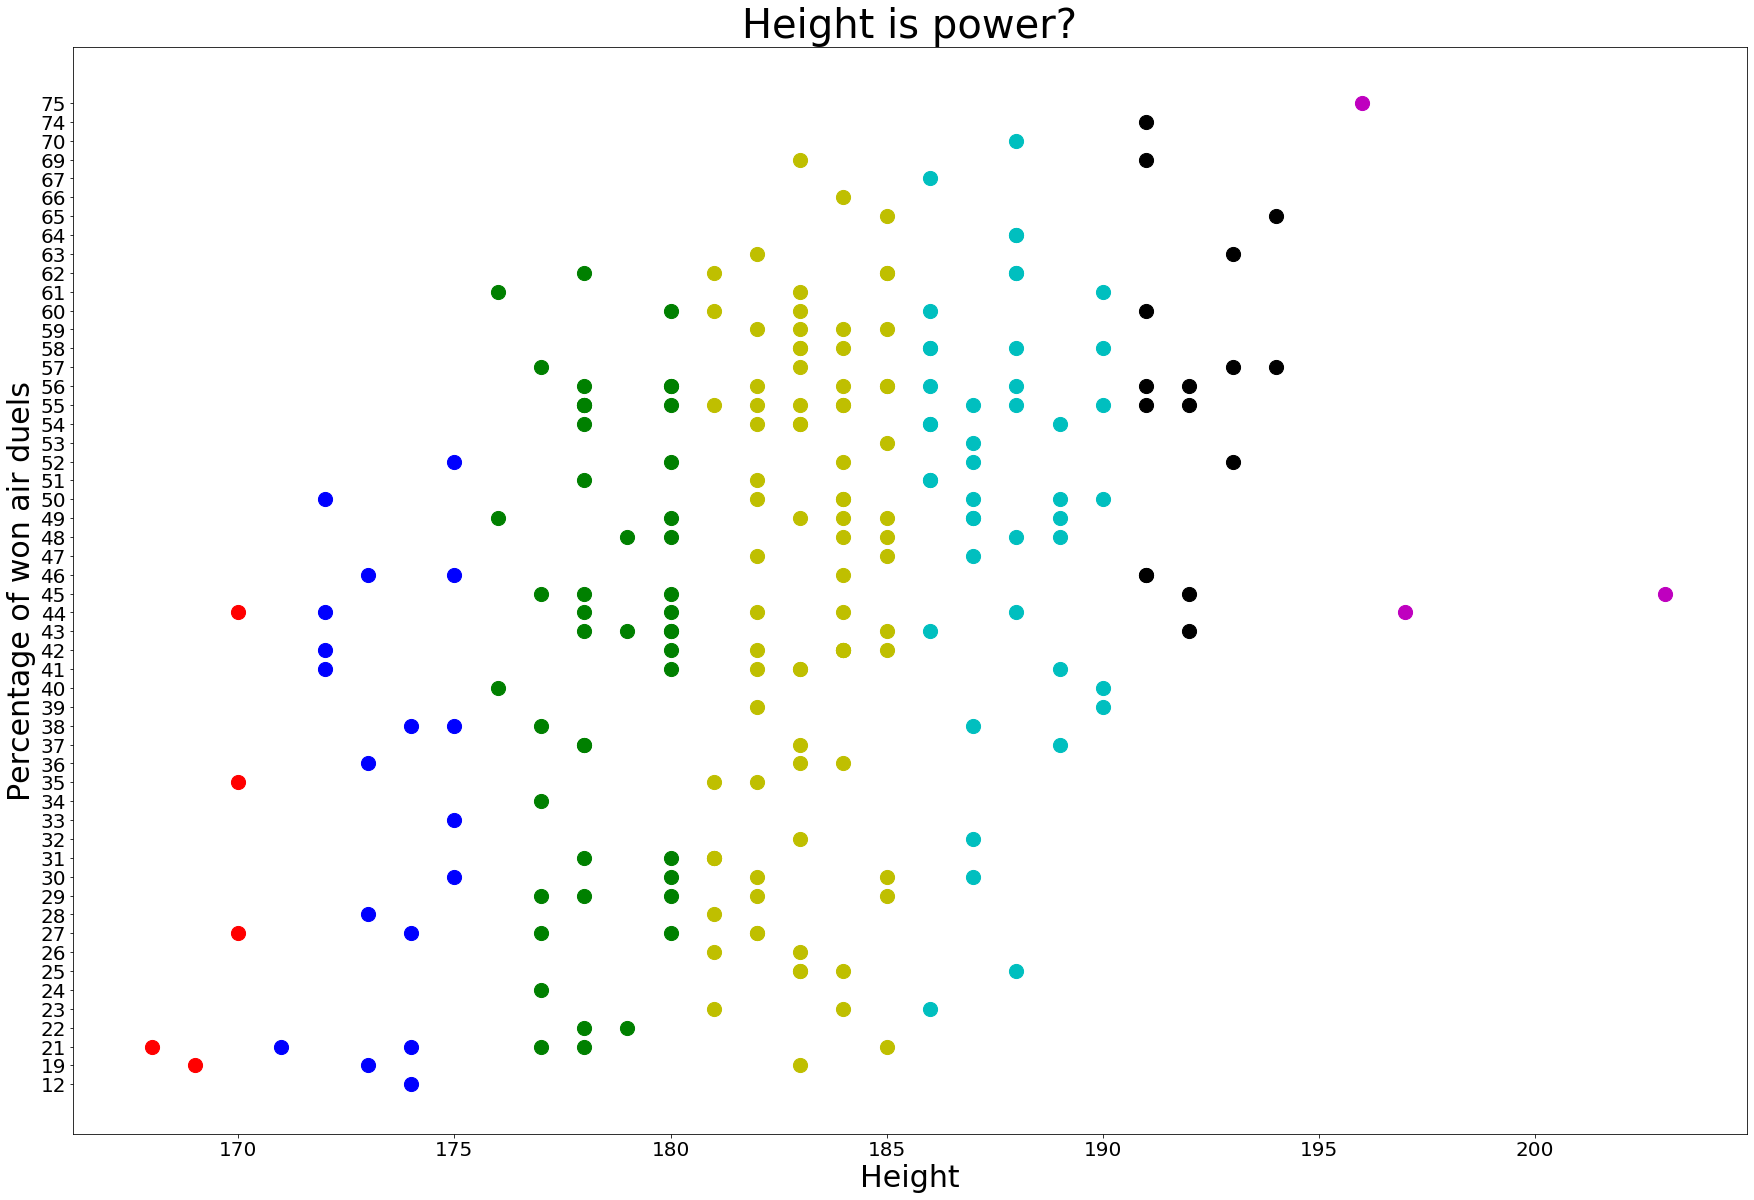

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_json("events_France.json")
df=pd.DataFrame(data,columns=['subEventName','tags','playerId'])
data1=pd.read_json("players.json")
df1=pd.DataFrame(data1,columns=['lastName','wyId','height',])

d1={}   #total of the air duel for every player
for ind in df.index:
    if (df['subEventName'][ind]=='Air duel'):
        if df['playerId'][ind] not in d1:
            d1[df['playerId'][ind]]=1
        else:
            d1[df['playerId'][ind]]+=1

#a=list(d1.values())
#print(sum(a)/len(a))  #The mean of number of air duels is 76.7. That's why I choosed the threshold 50(to include 'not so great, but trying' players)

for i in d1.keys():  #if the number of air duels for a player is smaller than 50 than make the players value 0
    if d1[i]<50:
        d1[i]=0
newd1={x:y for x,y in d1.items() if y!=0} #eliminate the elements of dict with a value 0 
#new dict of players and the number of air duels higher than specified threshold(50)

d2=[]   #total of air duel for every height

for ind in df1.index:
    if df1['wyId'][ind] in newd1:
         d2.append([df1['wyId'][ind],df1['height'][ind],newd1[df1['wyId'][ind]]])
        

d3={}   #total of the won air duel for every player
for ind in df.index:
    if (df['subEventName'][ind]=='Air duel'):
        if (df['tags'][ind])[0].get('id')==703:
            if df['playerId'][ind] not in d3:
                d3[df['playerId'][ind]]=1
            else:
                d3[df['playerId'][ind]]+=1


d4=[]   #total of won air duel for every height
for ind in df1.index:
    if df1['wyId'][ind] in d3:
        if df1['wyId'][ind] in newd1:
            d4.append([df1['wyId'][ind], df1['height'][ind],d3[df1['wyId'][ind]]])
      
res=[] #percentage of won air duel for every height
for i in range(len(d2)):
    key=d2[i][1]
    res.append([key,format((d4[i][2]/d2[i][2])*100,'.0f')])
res=sorted(res,key=lambda x: x[1])

plt.figure(figsize=(30,20))
for i in range(len(res)):
    if res[i][0] in range(165,171):
        plt.scatter(res[i][0],res[i][1],s=200,c='r')
    elif res[i][0] in range(171,176):
        plt.scatter(res[i][0],res[i][1],s=200,c='b')
    elif res[i][0] in range(176,181):
        plt.scatter(res[i][0],res[i][1],s=200,c='g')
    elif res[i][0] in range(181,186):
        plt.scatter(res[i][0],res[i][1],s=200,c='y')
    elif res[i][0] in range(186,191):
        plt.scatter(res[i][0],res[i][1],s=200,c='c')
    elif res[i][0] in range(191,196):
        plt.scatter(res[i][0],res[i][1],s=200,c='k')
    else:
        plt.scatter(res[i][0],res[i][1],s=200,c='m')
    
    
plt.title('Height is power?',fontsize=40)
plt.xlabel('Height',fontsize=30)
plt.ylabel('Percentage of won air duels',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

## RQ5 Spain

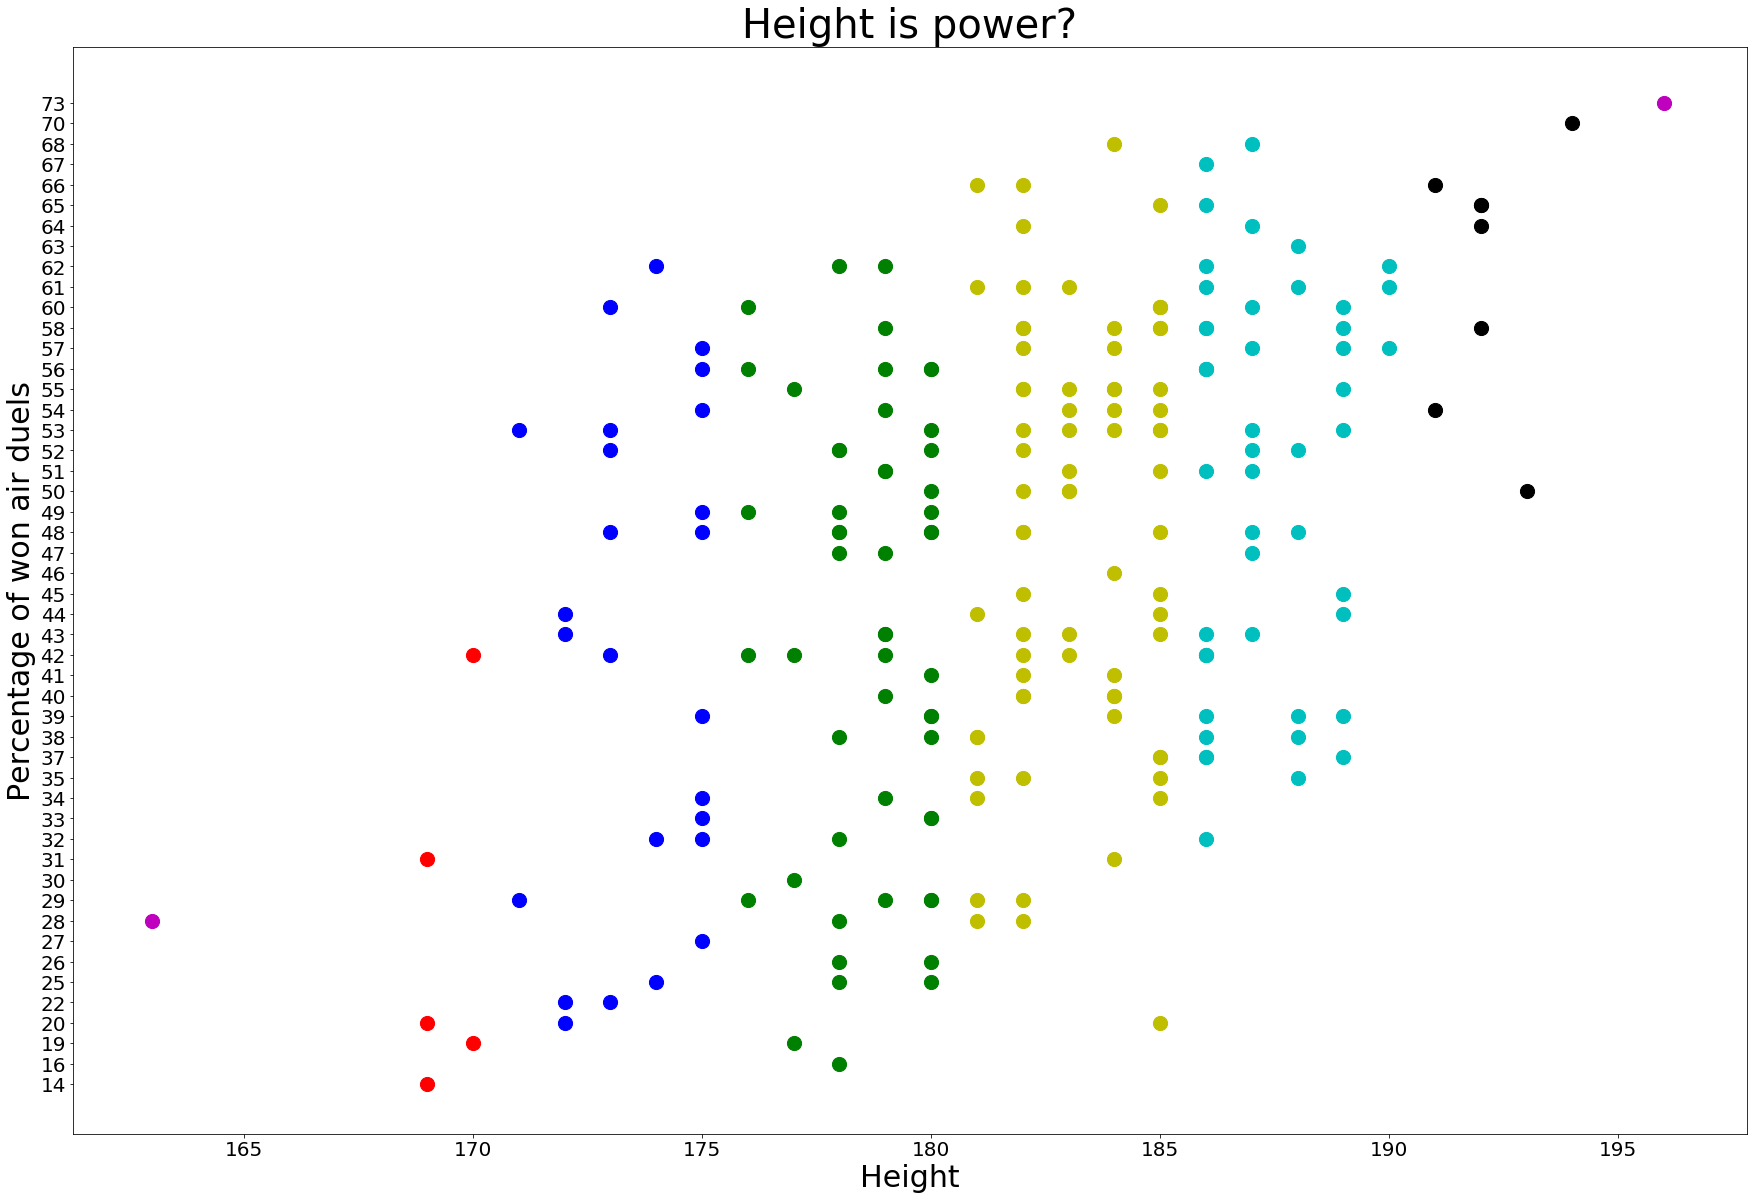

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_json("events_Spain.json")
df=pd.DataFrame(data,columns=['subEventName','tags','playerId'])
data1=pd.read_json("players.json")
df1=pd.DataFrame(data1,columns=['lastName','wyId','height',])

d1={}   #total of the air duel for every player
for ind in df.index:
    if (df['subEventName'][ind]=='Air duel'):
        if df['playerId'][ind] not in d1:
            d1[df['playerId'][ind]]=1
        else:
            d1[df['playerId'][ind]]+=1

#a=list(d1.values())
#print(sum(a)/len(a))  #The mean of number of air duels is 76.7. That's why I choosed the threshold 50(to include 'not so great, but trying' players)

for i in d1.keys():  #if the number of air duels for a player is smaller than 50 than make the players value 0
    if d1[i]<50:
        d1[i]=0
newd1={x:y for x,y in d1.items() if y!=0} #eliminate the elements of dict with a value 0 
#new dict of players and the number of air duels higher than specified threshold(50)

d2=[]   #total of air duel for every height

for ind in df1.index:
    if df1['wyId'][ind] in newd1:
         d2.append([df1['wyId'][ind],df1['height'][ind],newd1[df1['wyId'][ind]]])
        

d3={}   #total of the won air duel for every player
for ind in df.index:
    if (df['subEventName'][ind]=='Air duel'):
        if (df['tags'][ind])[0].get('id')==703:
            if df['playerId'][ind] not in d3:
                d3[df['playerId'][ind]]=1
            else:
                d3[df['playerId'][ind]]+=1


d4=[]   #total of won air duel for every height
for ind in df1.index:
    if df1['wyId'][ind] in d3:
        if df1['wyId'][ind] in newd1:
            d4.append([df1['wyId'][ind], df1['height'][ind],d3[df1['wyId'][ind]]])
      
res=[] #percentage of won air duel for every height
for i in range(len(d2)):
    key=d2[i][1]
    res.append([key,format((d4[i][2]/d2[i][2])*100,'.0f')])
res=sorted(res,key=lambda x: x[1])

plt.figure(figsize=(30,20))
for i in range(len(res)):
    if res[i][0] in range(165,171):
        plt.scatter(res[i][0],res[i][1],s=200,c='r')
    elif res[i][0] in range(171,176):
        plt.scatter(res[i][0],res[i][1],s=200,c='b')
    elif res[i][0] in range(176,181):
        plt.scatter(res[i][0],res[i][1],s=200,c='g')
    elif res[i][0] in range(181,186):
        plt.scatter(res[i][0],res[i][1],s=200,c='y')
    elif res[i][0] in range(186,191):
        plt.scatter(res[i][0],res[i][1],s=200,c='c')
    elif res[i][0] in range(191,196):
        plt.scatter(res[i][0],res[i][1],s=200,c='k')
    else:
        plt.scatter(res[i][0],res[i][1],s=200,c='m')
    
    
plt.title('Height is power?',fontsize=40)
plt.xlabel('Height',fontsize=30)
plt.ylabel('Percentage of won air duels',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()